In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset:

Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [2]:
atts = pd.read_csv("magic04.names", on_bad_lines='skip')
atts

1. Title of Database: MAGIC gamma telescope data 2004
0                                         2. Sources:   
1                 (a) Original owner of the database:   
2                                          R. K. Bock   
3          Major Atmospheric Gamma Imaging Cherenk...   
4                        http://wwwmagic.mppmu.mpg.de   
5                                    rkb@mail.cern.ch   
6                                          (b) Donor:   
7                                          P. Savicky   
8                                      Czech Republic   
9                                   savicky@cs.cas.cz   
10                        (c) Date received: May 2007   
11                                     3. Past Usage:   
12         Methods for multidimensional event clas...   
13         using images from a Cherenkov gamma-ray...   
14         Experimental Study of Leaf Confidences ...   
15         Softening Splits in Decision Trees Usin...   
16                           4. Relevant Information:   
17     The data are MC generated (see below) to si...   
18     gamma particles in a ground-based atmospher...   
19     taking advantage of the radiation emitted b...   
20     atmosphere. This Cherenkov radiation (of vi...   
21     of the shower parameters. The available inf...   
22     caused by primary gammas (signal) from the ...   
23     initiated by cosmic rays in the upper atmos...   
24     cluster. Its long axis is oriented towards ...   
25     directed towards a point source. A principa...   
26     an equidensity ellipse. The characteristic ...   
27     (often called Hillas parameters) are among ...   
28     used for discrimination. The energy deposit...   
29        Forschungszentrum Karlsruhe FZKA 6019 (1...   
30     The program was run with parameters allowin...   
31                                   to below 50 GeV.   
32                      5. Number of Instances: 19020   
33  6. Number of Attributes: 11 (including the class)   
34                          7. Attribute information:   
35      1.  fLength:  continuous  # major axis of ...   
36      2.  fWidth:   continuous  # minor axis of ...   
37      3.  fSize:    continuous  # 10-log of sum ...   
38      4.  fConc:    continuous  # ratio of sum o...   
39      5.  fConc1:   continuous  # ratio of highe...   
40      7.  fM3Long:  continuous  # 3rd root of th...   
41      8.  fM3Trans: continuous  # 3rd root of th...   
42      9.  fAlpha:   continuous  # angle of major...   
43     10.  fDist:    continuous  # distance from ...   
44                  8. Missing Attribute Values: None   
45                             9. Class Distribution:   
46                      g = gamma (signal):     12332   
47                      h = hadron (background): 6688   
48     classifying a background event as signal is...   
49     event as background. For comparison of diff...   
50     probability of accepting a background event...   
51     quality of the sample of the accepted event...

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head(-5)

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   
...         ...       ...     ...     ...     ...       ...      ...   
19010   32.4902   10.6723  2.4742  0.4664  0.2735  -27.0097 -21.1687   
19011   79.5528   44.9929  3.5488  0.1656  0.0900  -39.6213  53.7866   
19012   31.8373   13.8734  2.8251  0.4169  0.1988  -16.4919 -27.1448   
19013  182.5003   76.5568  3.6872  0.1123  0.0666  192.2675  93.0302   
19014   43.2980   17.3545  2.8307  0.2877  0.1646  -60.1842 -33.8513   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610     g  
2      -45.2160  76.9600  256.7880     g  
3       -7.1513  10.4490  116.7370     g  
4       21.8393   4.6480  356.4620     g  
...         ...      ...       ...   ...  
19010    8.4813  69.1730  120.6680     h  
19011  -30.0054  15.8075  311.5680     h  
19012   11.1098  11.3663  100.0566     h  
19013  -62.6192  82.1691  283.4731     h  
19014   -3.6545  78.4099  224.8299     h  

[19015 rows x 11 columns]

In [4]:
# converting the g and h to 1 and 0. if the entries in the column are a g then its true therefore 1 and if they are h then false therefore 0
df["class"] = (df["class"] == "h").astype(int)

In [5]:
df.head(-5)

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   
...         ...       ...     ...     ...     ...       ...      ...   
19010   32.4902   10.6723  2.4742  0.4664  0.2735  -27.0097 -21.1687   
19011   79.5528   44.9929  3.5488  0.1656  0.0900  -39.6213  53.7866   
19012   31.8373   13.8734  2.8251  0.4169  0.1988  -16.4919 -27.1448   
19013  182.5003   76.5568  3.6872  0.1123  0.0666  192.2675  93.0302   
19014   43.2980   17.3545  2.8307  0.2877  0.1646  -60.1842 -33.8513   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      0  
1       -9.9574   6.3609  205.2610      0  
2      -45.2160  76.9600  256.7880      0  
3       -7.1513  10.4490  116.7370      0  
4       21.8393   4.6480  356.4620      0  
...         ...      ...       ...    ...  
19010    8.4813  69.1730  120.6680      1  
19011  -30.0054  15.8075  311.5680      1  
19012   11.1098  11.3663  100.0566      1  
19013  -62.6192  82.1691  283.4731      1  
19014   -3.6545  78.4099  224.8299      1  

[19015 rows x 11 columns]

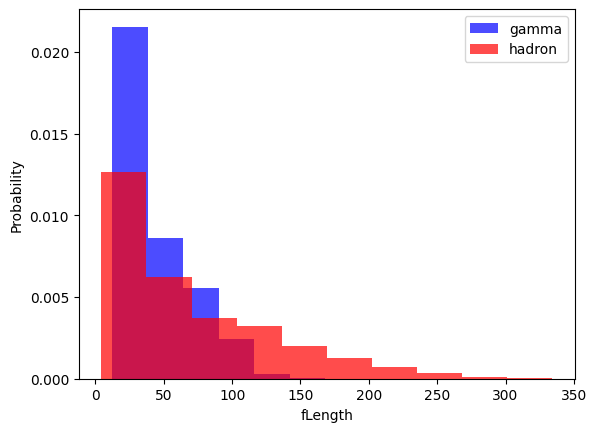

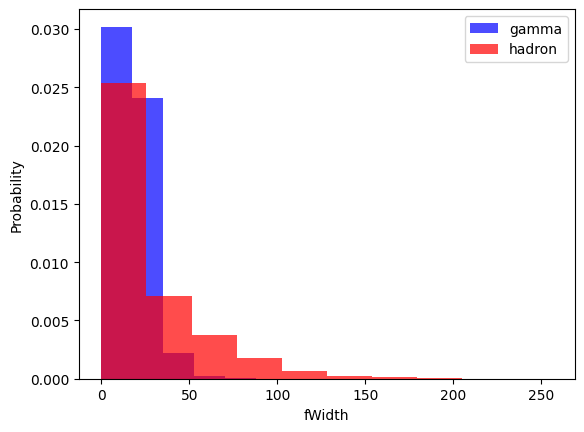

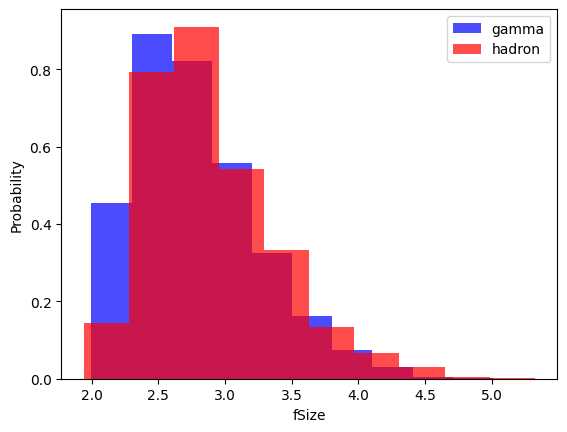

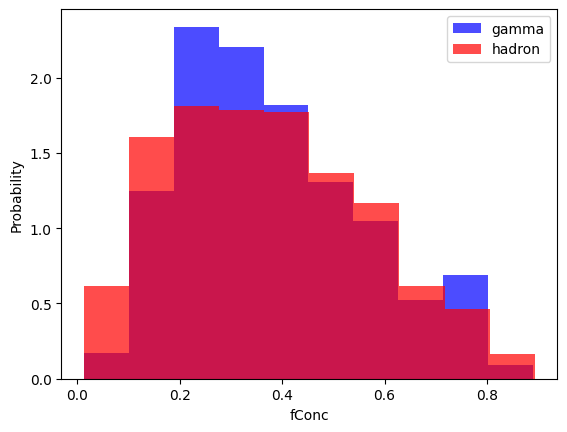

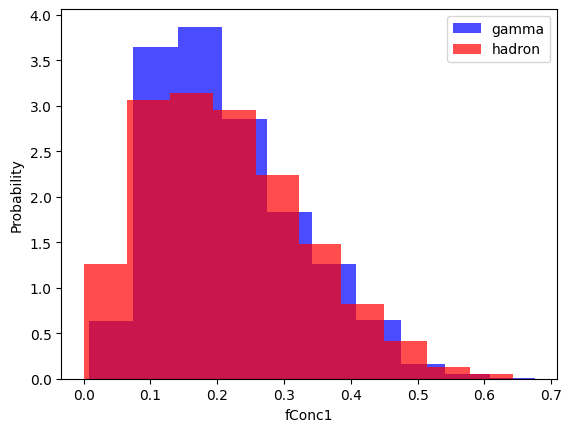

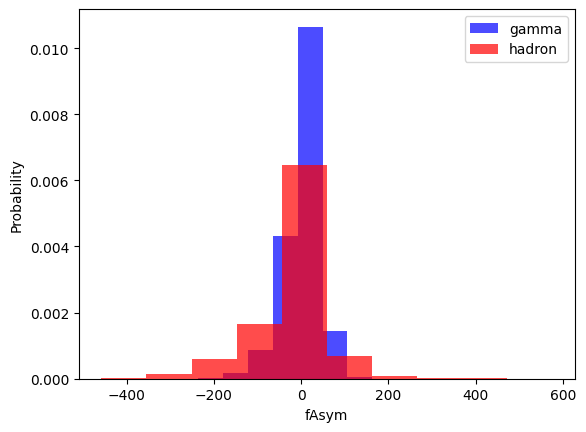

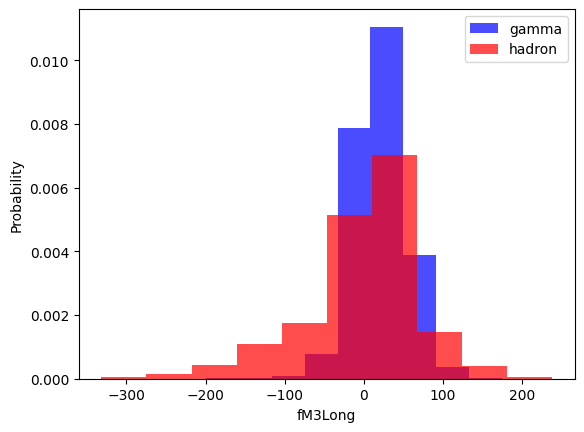

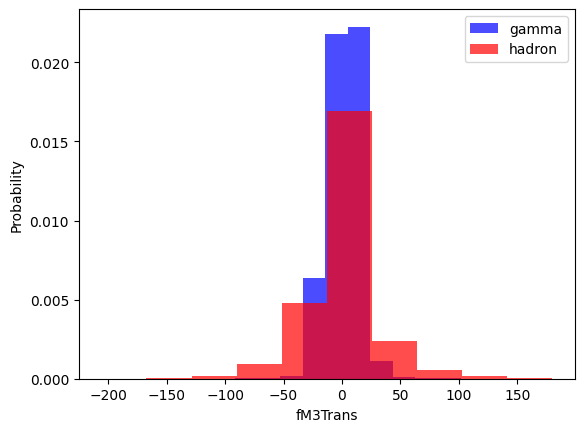

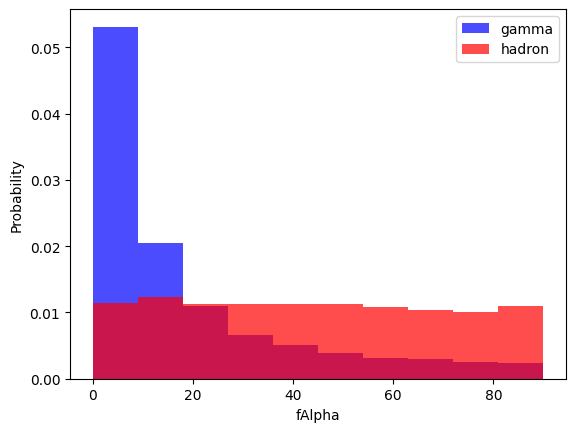

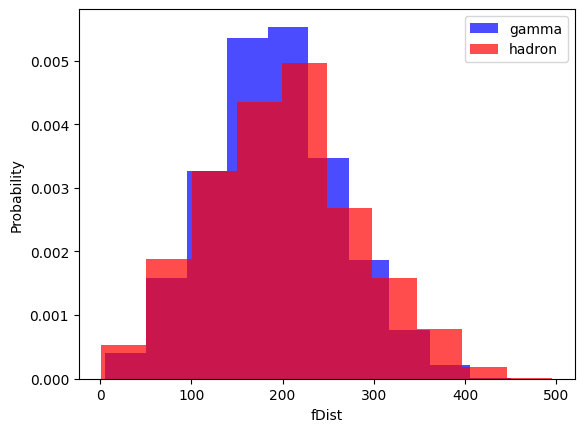

In [6]:
# density normalizes to equalize the comparision the comparision
for label in cols[:-1]:
  plt.hist(df[df["class"]==0][label], color = 'blue', label = 'gamma', alpha = 0.7, density=True)
  plt.hist(df[df["class"]==1][label], color = 'red', label = 'hadron', alpha = 0.7, density=True)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, Validation, Test datasets

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [9]:
def scale_dataset(dataframe, oversample=False):
   if isinstance(dataframe, pd.DataFrame):
        X = dataframe.iloc[:, :-1].values
        y = dataframe.iloc[:, -1].values
   else:
        # assume it's a NumPy array
        X = dataframe[:, :-1]
        y = dataframe[:, -1]

   scaler = StandardScaler()
   X = scaler.fit_transform(X)

   if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

   data = np.hstack((X, np.reshape(y, (-1,1))))

   return data, X, y

In [10]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False) #DONT WANNA OVERSAMPLE HERE
test, X_test, y_test = scale_dataset(test, oversample = False)

#K-NEAREST NEIGHBORS

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=29)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [13]:
y_pred = knn_model.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2492
           1       0.80      0.74      0.77      1312

    accuracy                           0.85      3804
   macro avg       0.83      0.82      0.83      3804
weighted avg       0.84      0.85      0.84      3804



#NAIVE  BAYES


In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [17]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.82      2492
           1       0.69      0.41      0.51      1312

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



# LOGISTIC REGRESSION

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [20]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2492
           1       0.69      0.74      0.71      1312

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



#SUPPORT VECTOR MACHINES (SVM)

In [21]:
from sklearn.svm import SVC

In [22]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [23]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2492
           1       0.82      0.80      0.81      1312

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



##Neural Net

In [24]:
import tensorflow as tf

In [34]:
def plot_history(history):
  fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,8))
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)


  ax2.plot(history.history['accuracy'], label = 'accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()

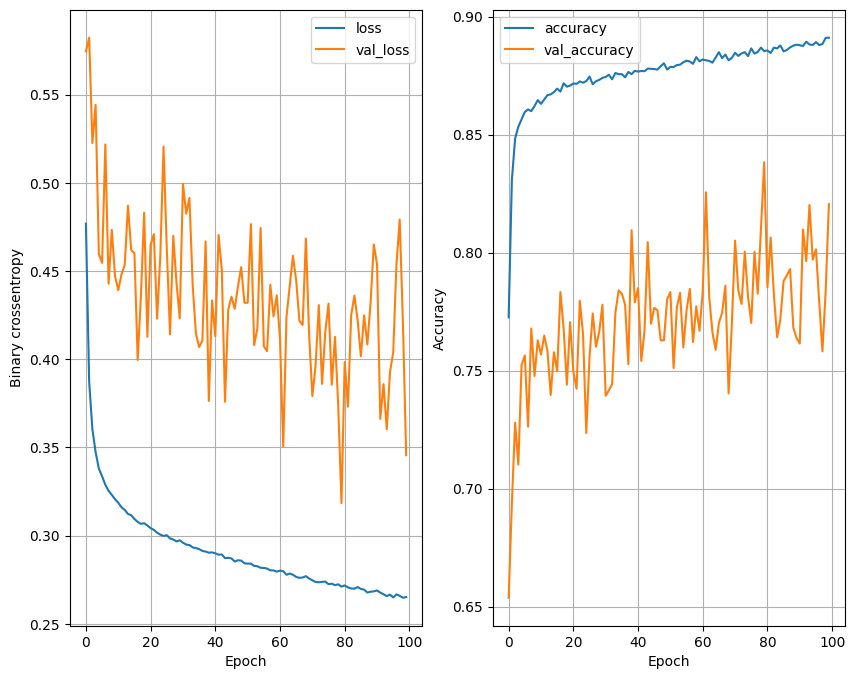

In [35]:
plot_history(history)

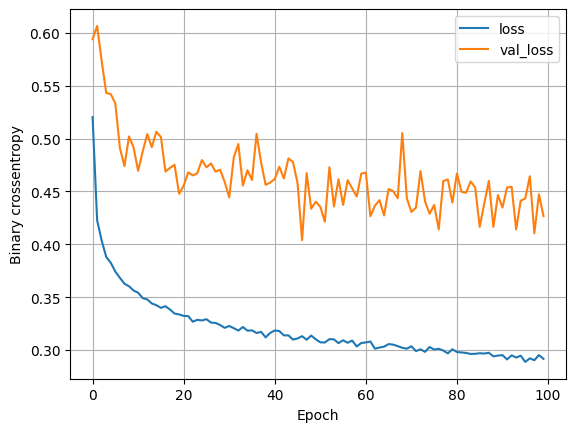

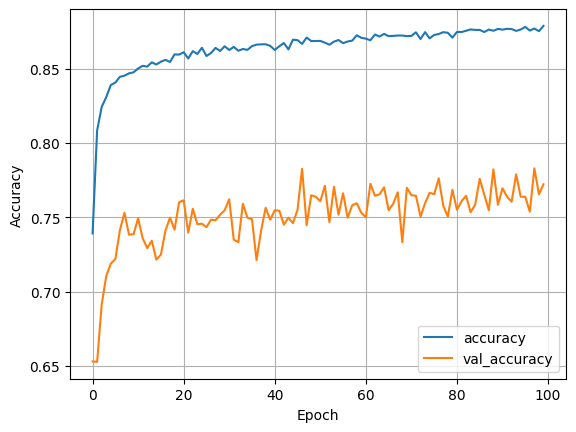

In [44]:
#plot_loss(history)
#plot_accuracy(history)

#updated this in plot_history function

In [31]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape = (10, )),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',
                 metrics = ['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0
  )

  return nn_model, history

In [45]:
history = nn_model.fit(
    X_train, y_train,
    epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0
)
#use verbose = 0 to not have all the epochs show, might get tedious

16 nodes, dropout 0, lr 0.01, batch size 32


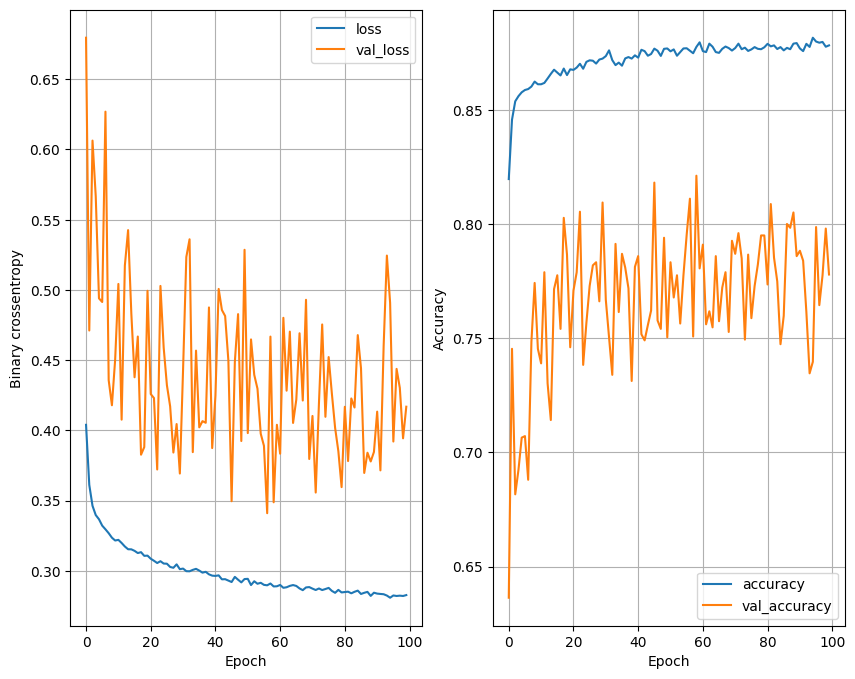

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8778 - loss: 0.3257
16 nodes, dropout 0, lr 0.01, batch size 64


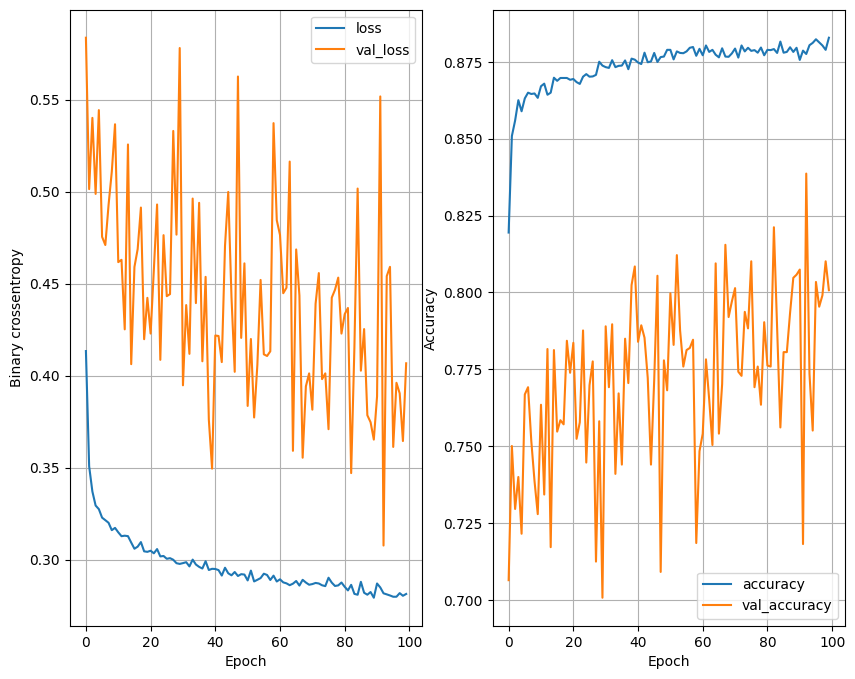

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8770 - loss: 0.3238
16 nodes, dropout 0, lr 0.01, batch size 128


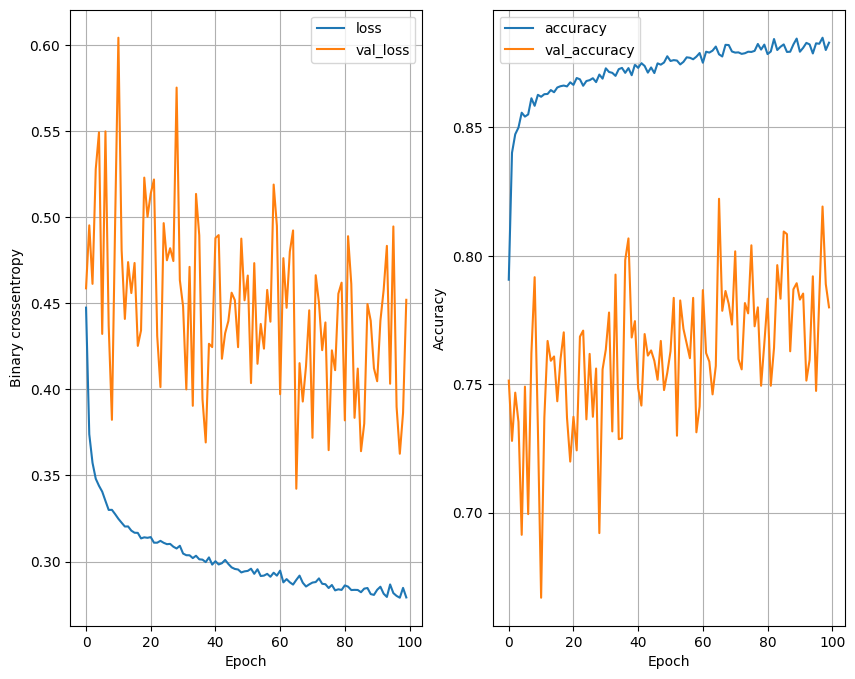

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8757 - loss: 0.3338
16 nodes, dropout 0, lr 0.005, batch size 32


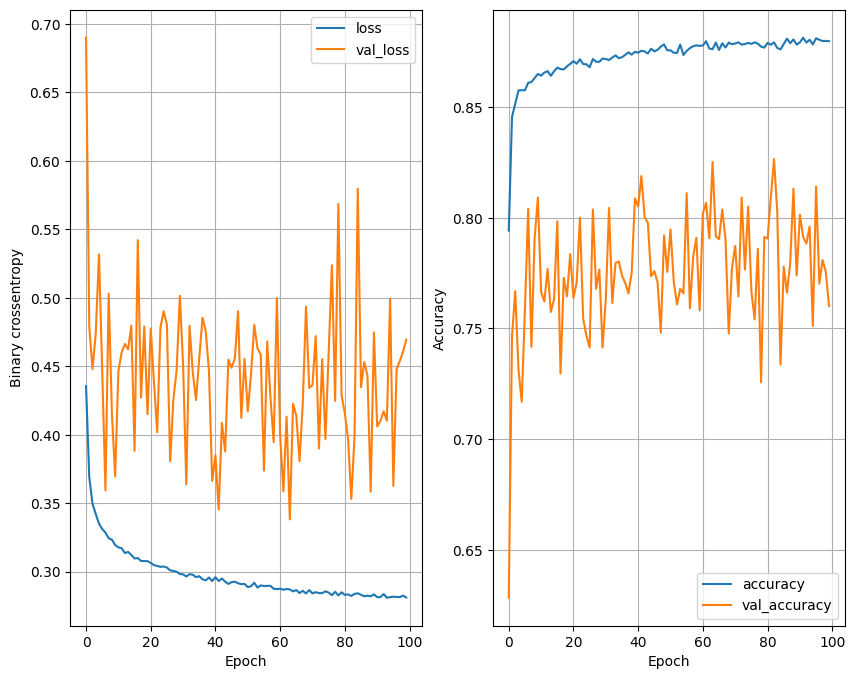

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8752 - loss: 0.3201
16 nodes, dropout 0, lr 0.005, batch size 64


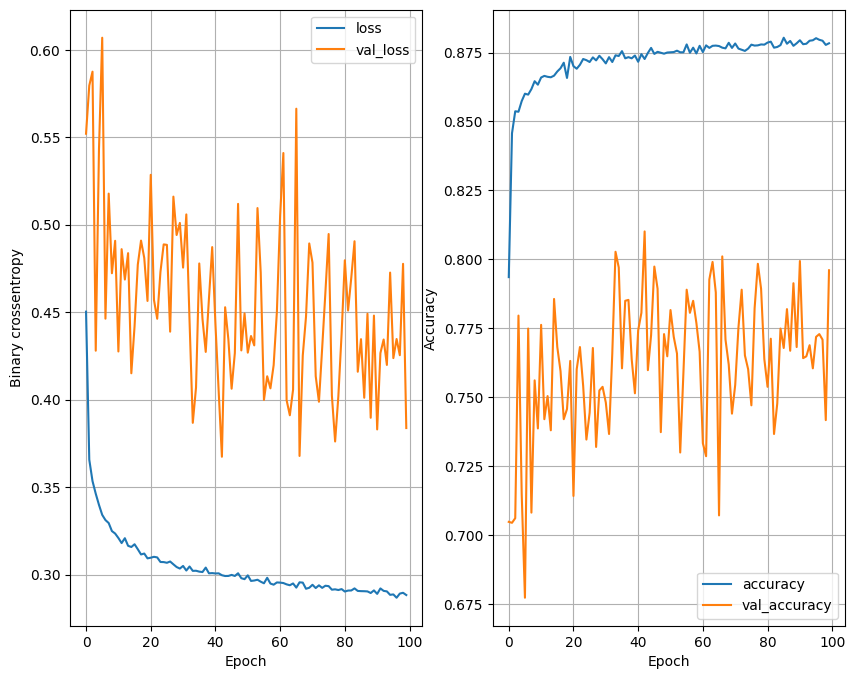

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8730 - loss: 0.3157
16 nodes, dropout 0, lr 0.005, batch size 128


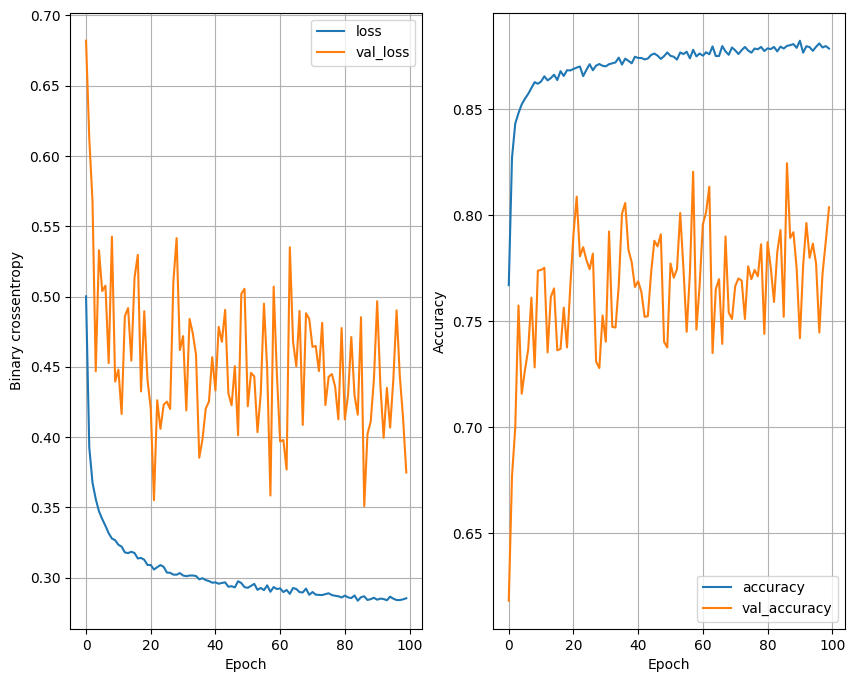

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.3146
16 nodes, dropout 0, lr 0.001, batch size 32


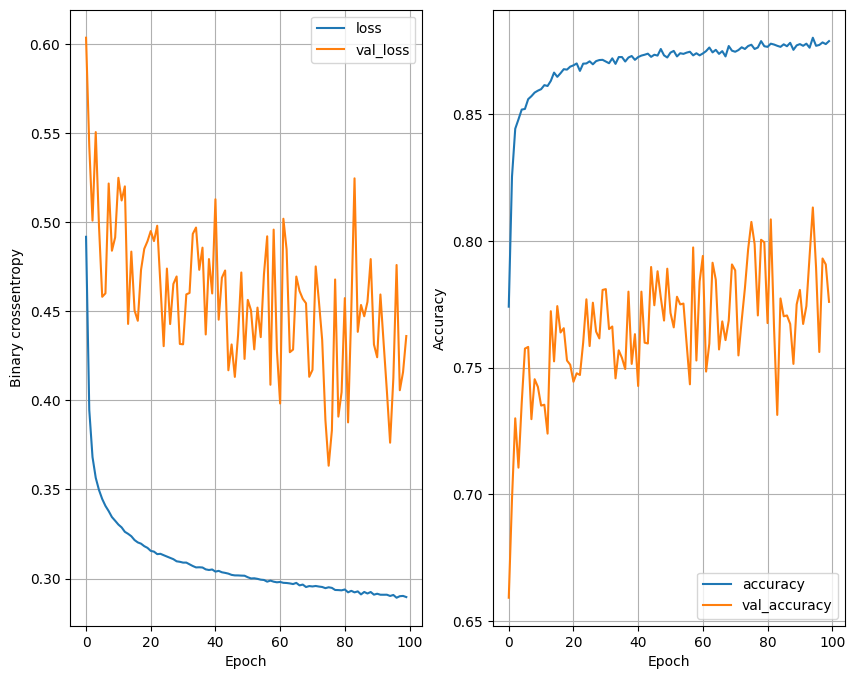

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8785 - loss: 0.3105
16 nodes, dropout 0, lr 0.001, batch size 64


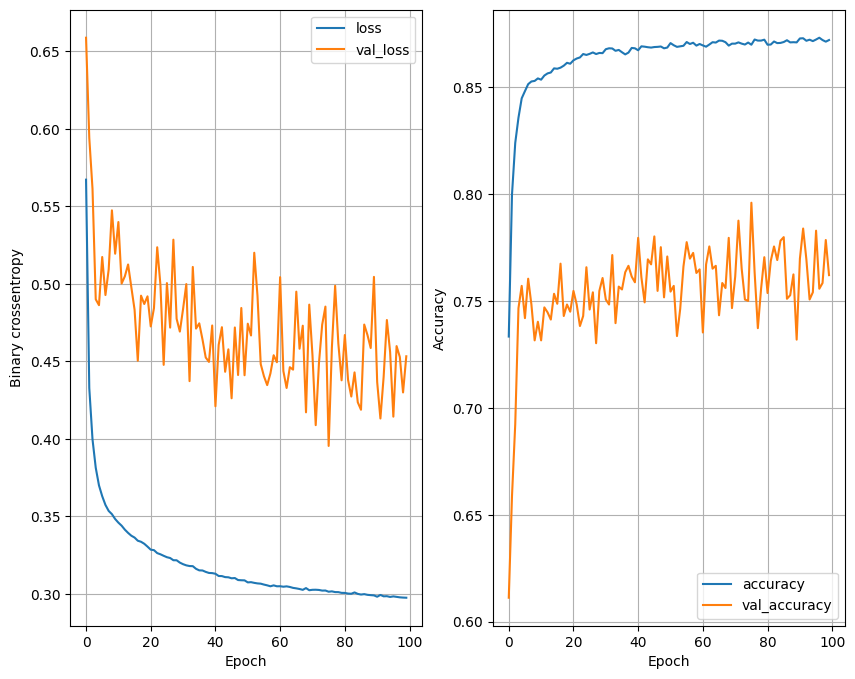

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8794 - loss: 0.3084
16 nodes, dropout 0, lr 0.001, batch size 128


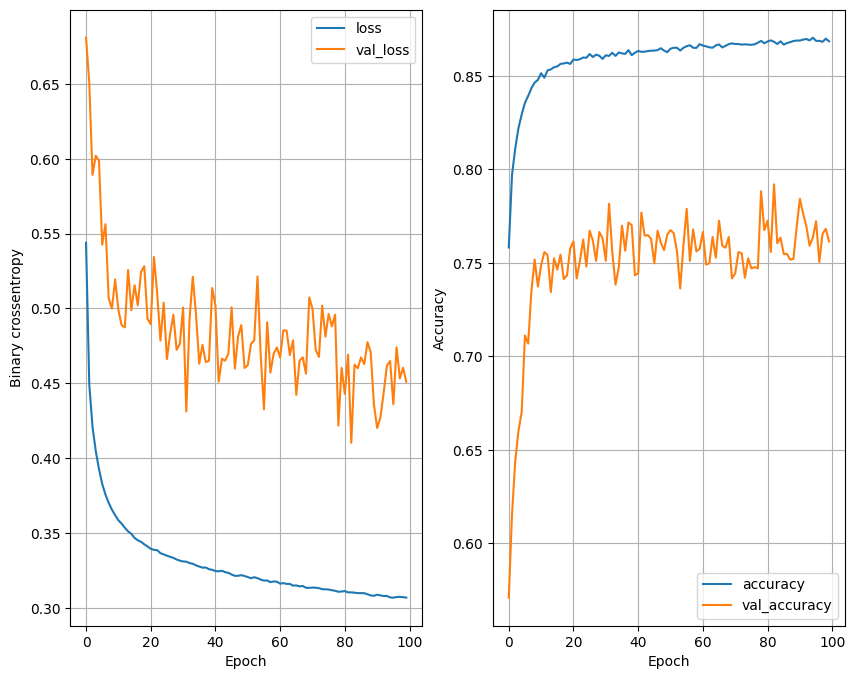

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8735 - loss: 0.3109
16 nodes, dropout 0.2, lr 0.01, batch size 32


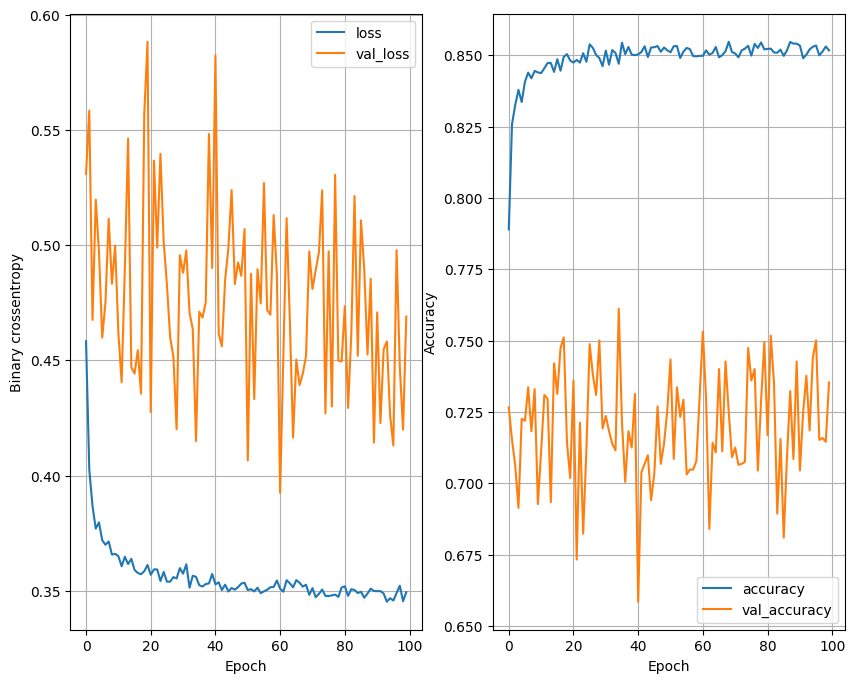

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8731 - loss: 0.3146
16 nodes, dropout 0.2, lr 0.01, batch size 64


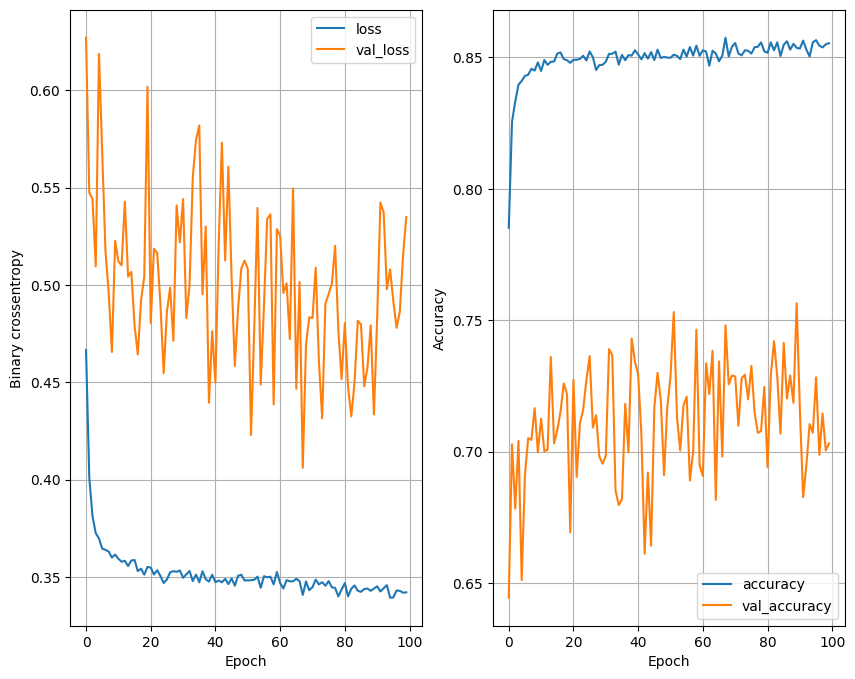

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3144
16 nodes, dropout 0.2, lr 0.01, batch size 128


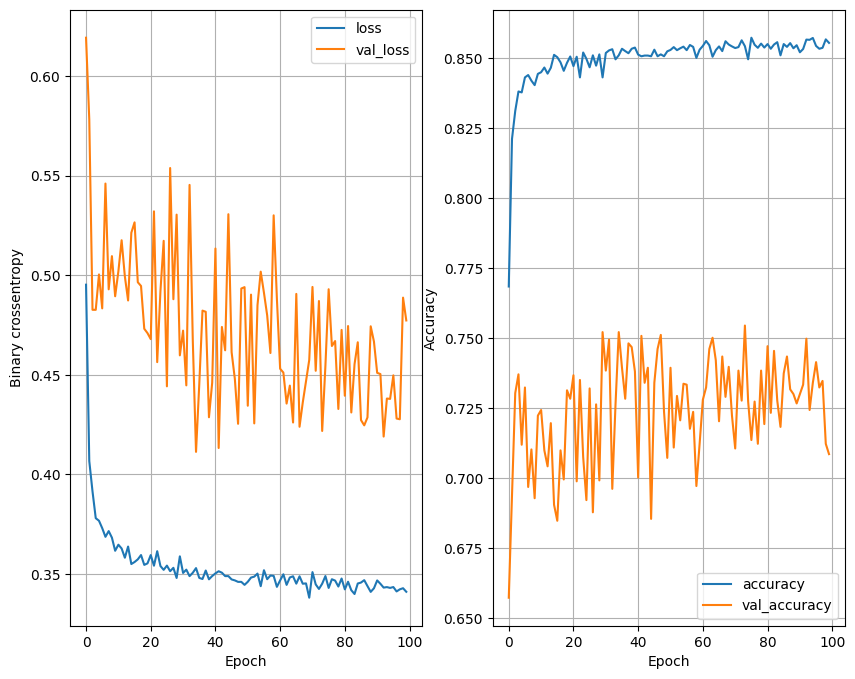

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8697 - loss: 0.3183
16 nodes, dropout 0.2, lr 0.005, batch size 32


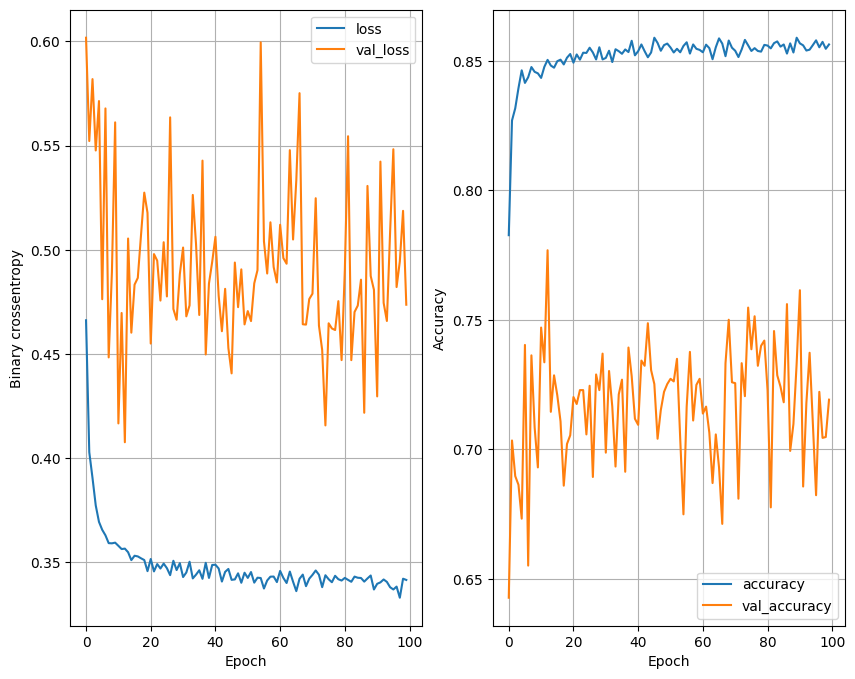

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8697 - loss: 0.3189
16 nodes, dropout 0.2, lr 0.005, batch size 64


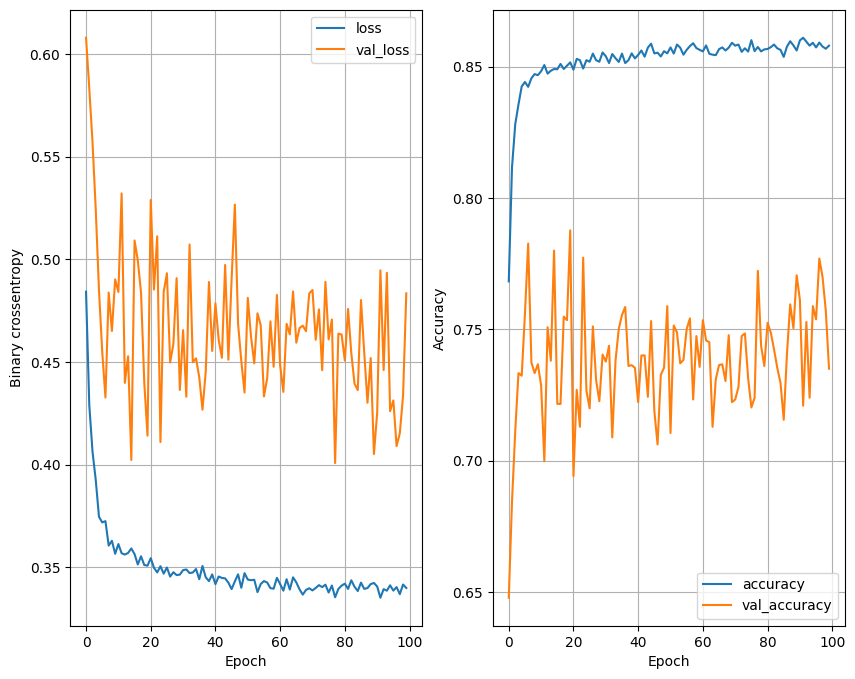

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8674 - loss: 0.3181
16 nodes, dropout 0.2, lr 0.005, batch size 128


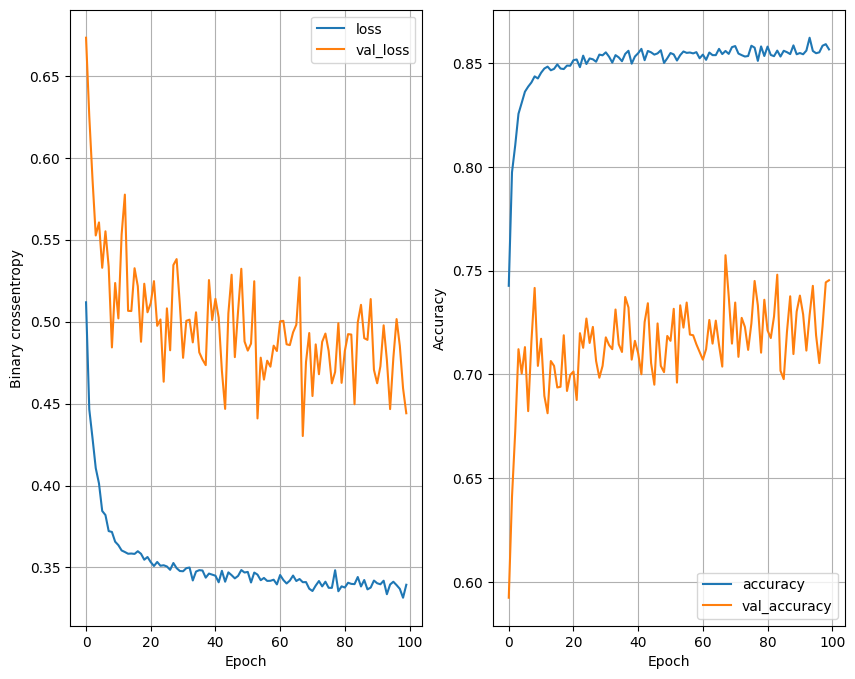

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - loss: 0.3139
16 nodes, dropout 0.2, lr 0.001, batch size 32


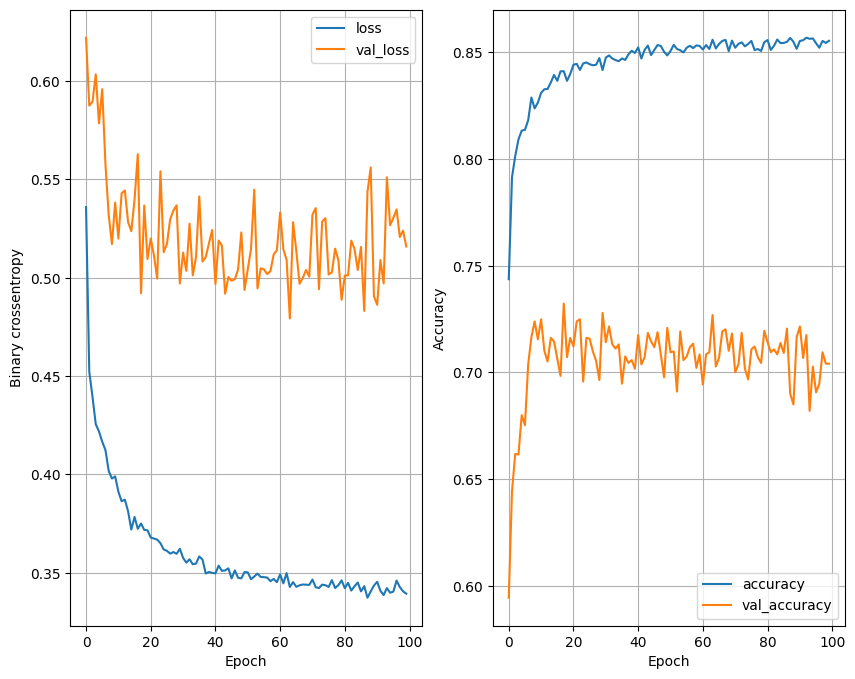

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.3212
16 nodes, dropout 0.2, lr 0.001, batch size 64


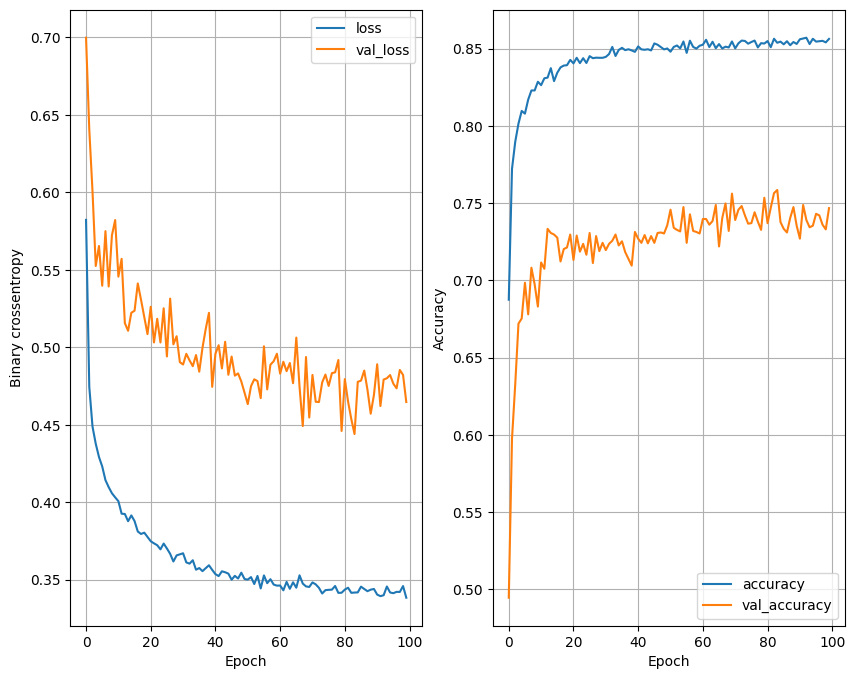

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8772 - loss: 0.3143
16 nodes, dropout 0.2, lr 0.001, batch size 128


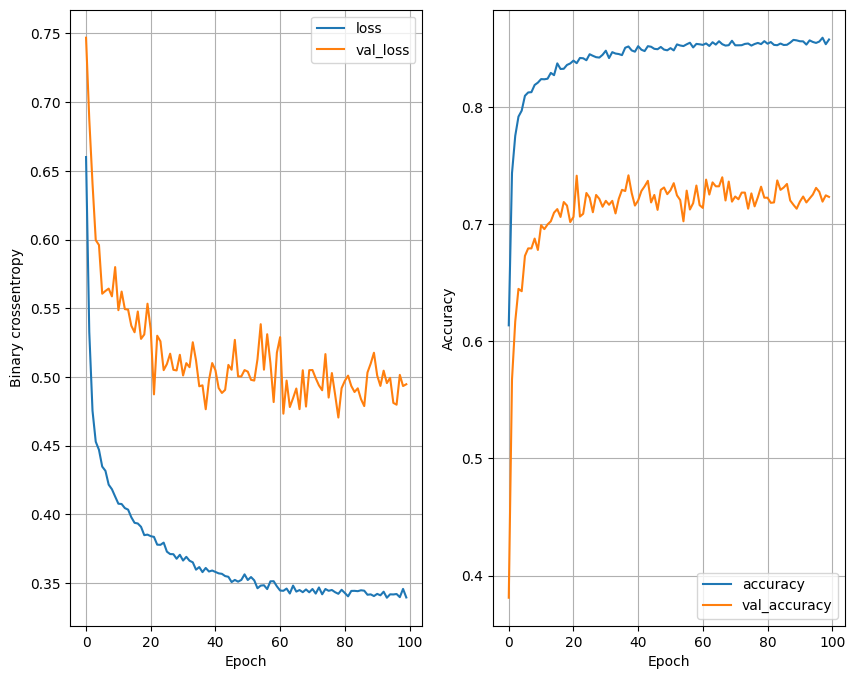

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.3171
32 nodes, dropout 0, lr 0.01, batch size 32


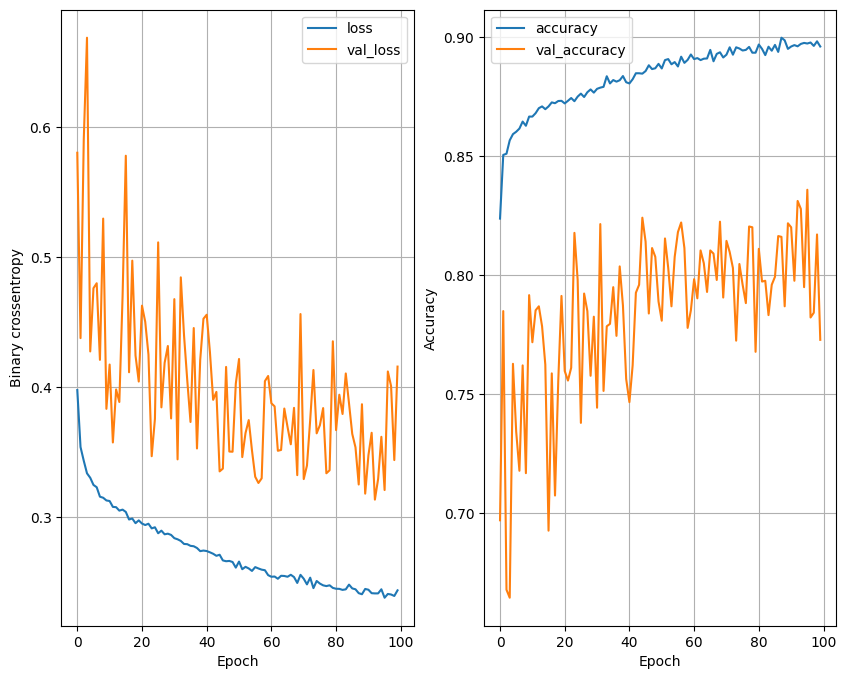

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.3666
32 nodes, dropout 0, lr 0.01, batch size 64


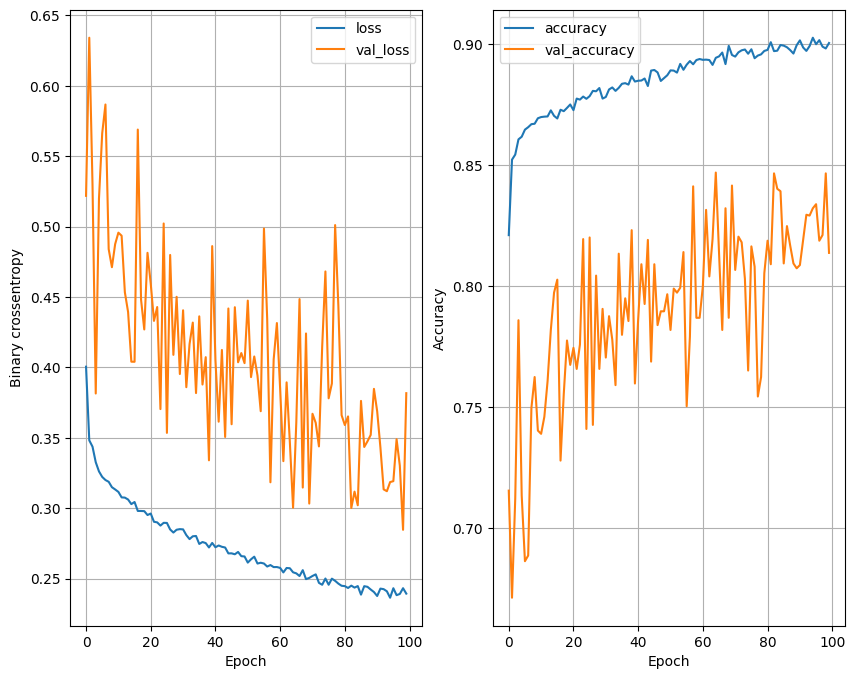

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8669 - loss: 0.3879
32 nodes, dropout 0, lr 0.01, batch size 128


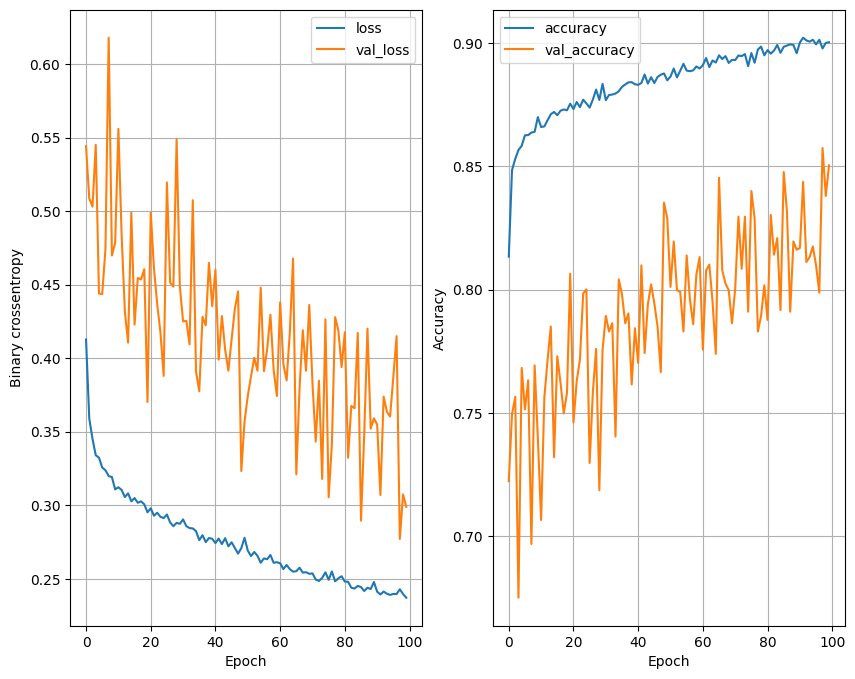

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8706 - loss: 0.3550
32 nodes, dropout 0, lr 0.005, batch size 32


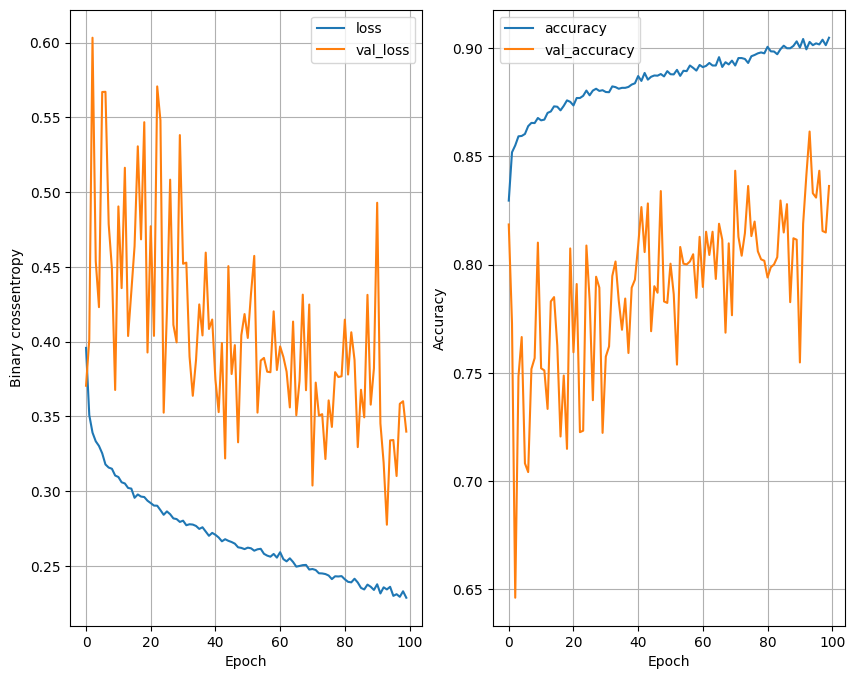

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8675 - loss: 0.3847
32 nodes, dropout 0, lr 0.005, batch size 64


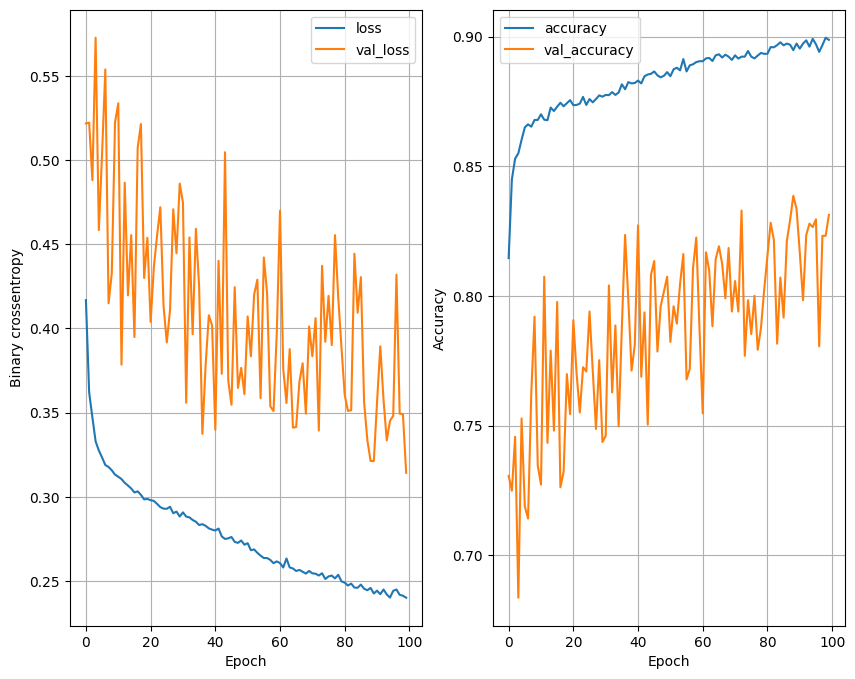

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8751 - loss: 0.3622
32 nodes, dropout 0, lr 0.005, batch size 128


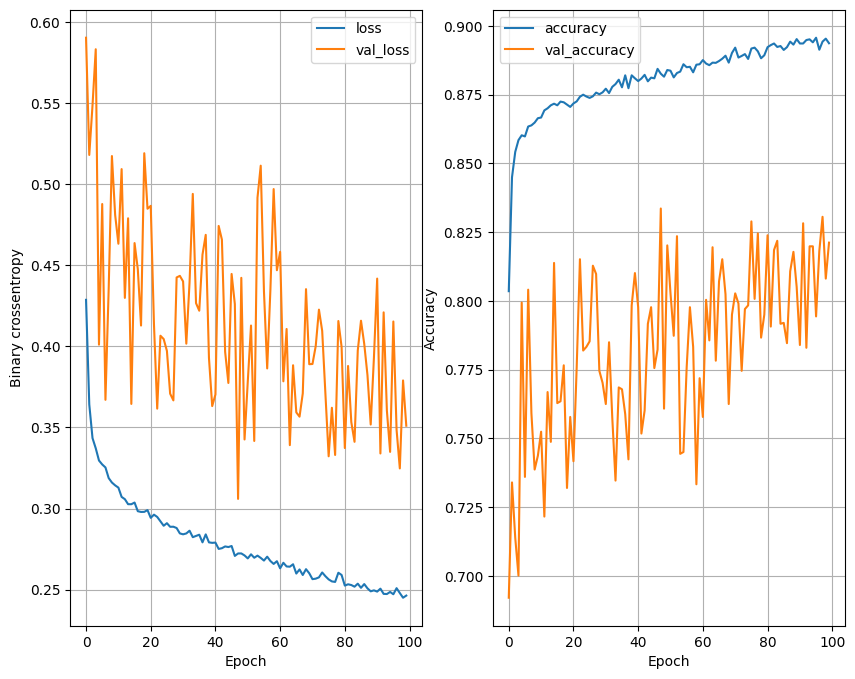

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8682 - loss: 0.3357
32 nodes, dropout 0, lr 0.001, batch size 32


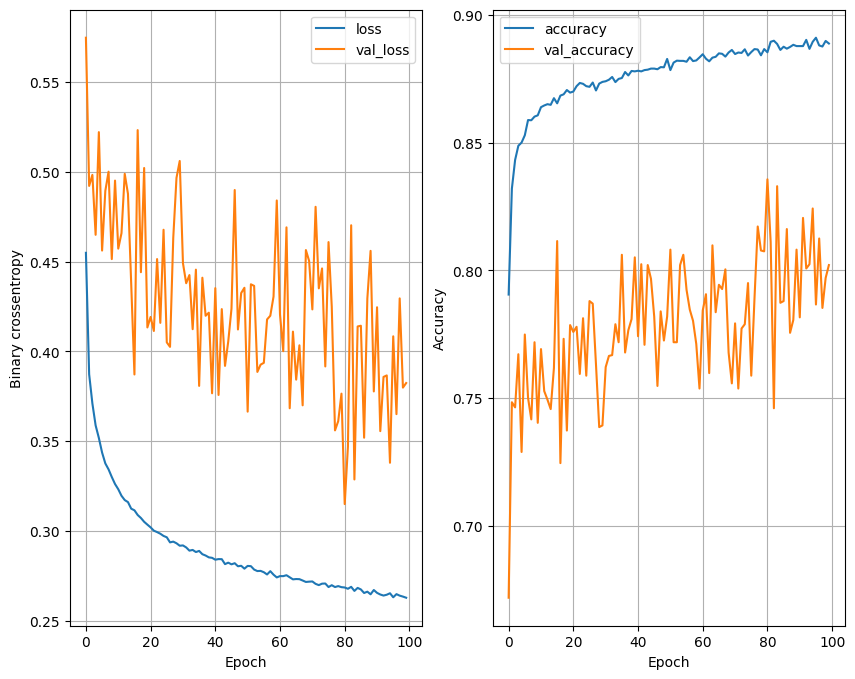

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8719 - loss: 0.3203
32 nodes, dropout 0, lr 0.001, batch size 64


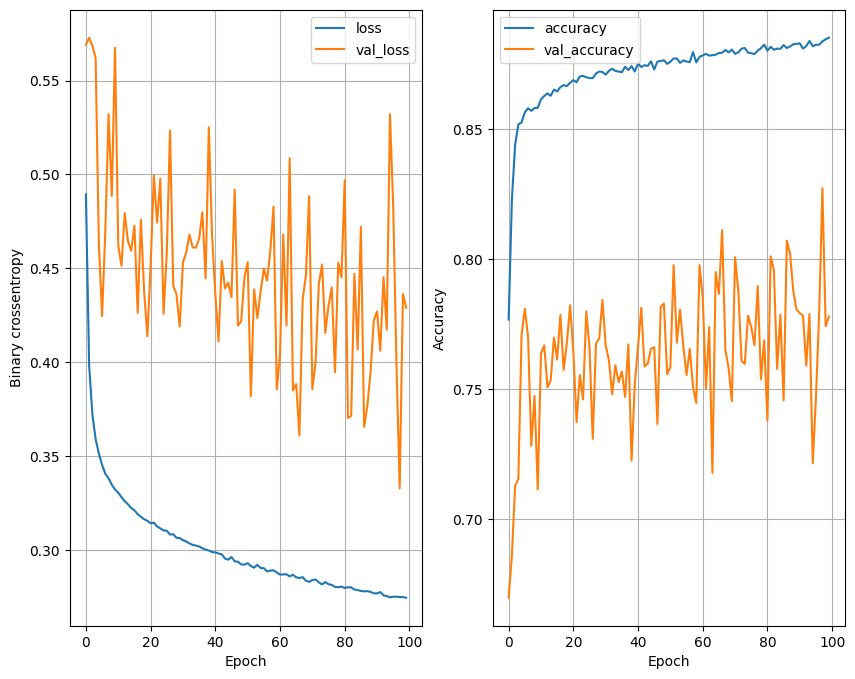

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8763 - loss: 0.3100
32 nodes, dropout 0, lr 0.001, batch size 128


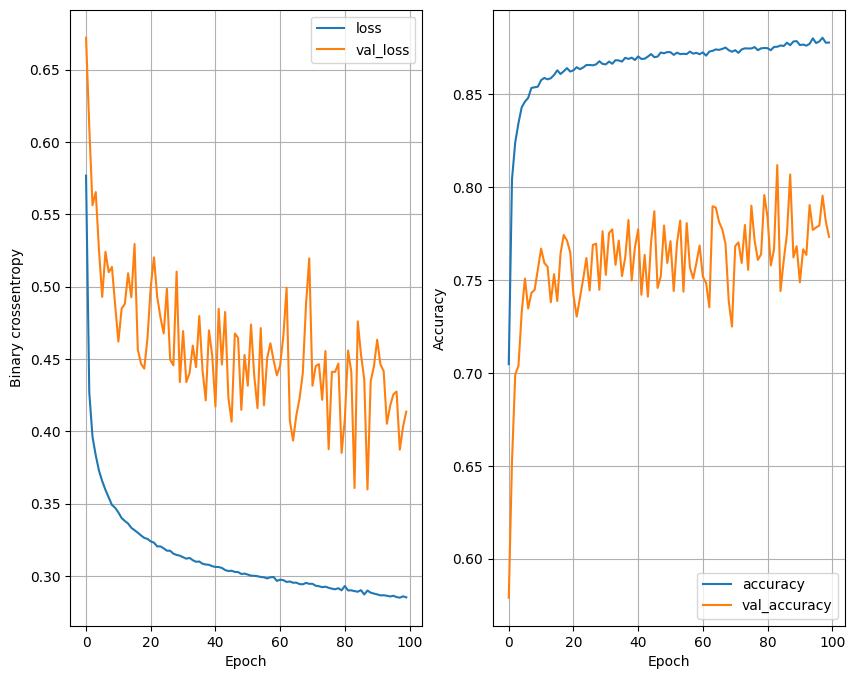

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8746 - loss: 0.3096
32 nodes, dropout 0.2, lr 0.01, batch size 32


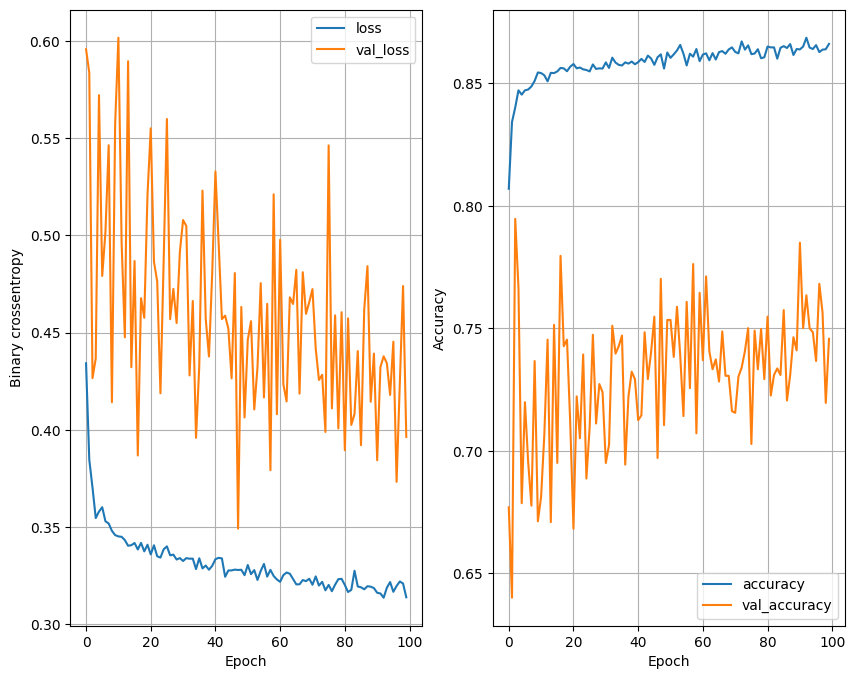

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8724 - loss: 0.3151
32 nodes, dropout 0.2, lr 0.01, batch size 64


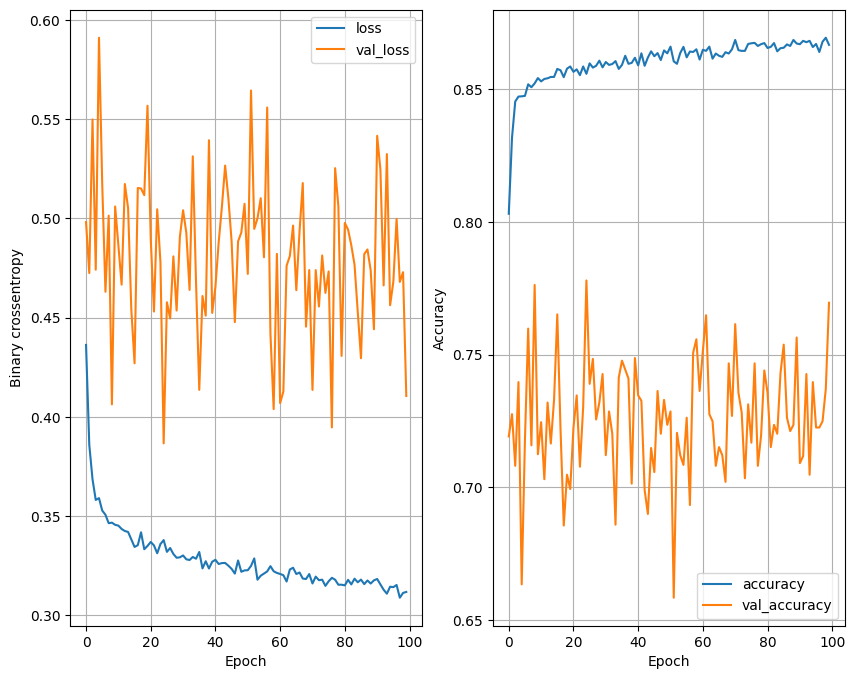

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8751 - loss: 0.3044
32 nodes, dropout 0.2, lr 0.01, batch size 128


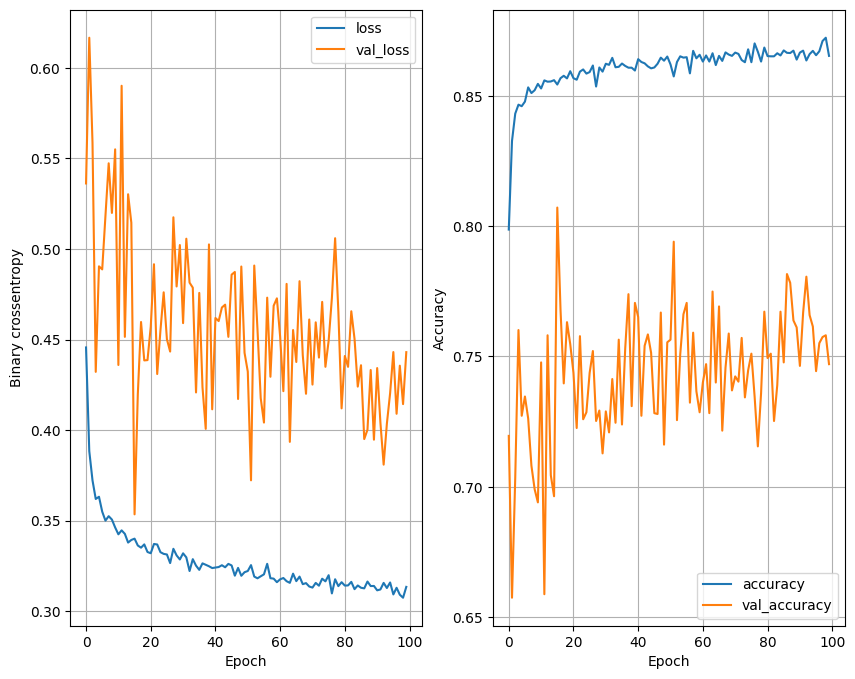

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8712 - loss: 0.3101
32 nodes, dropout 0.2, lr 0.005, batch size 32


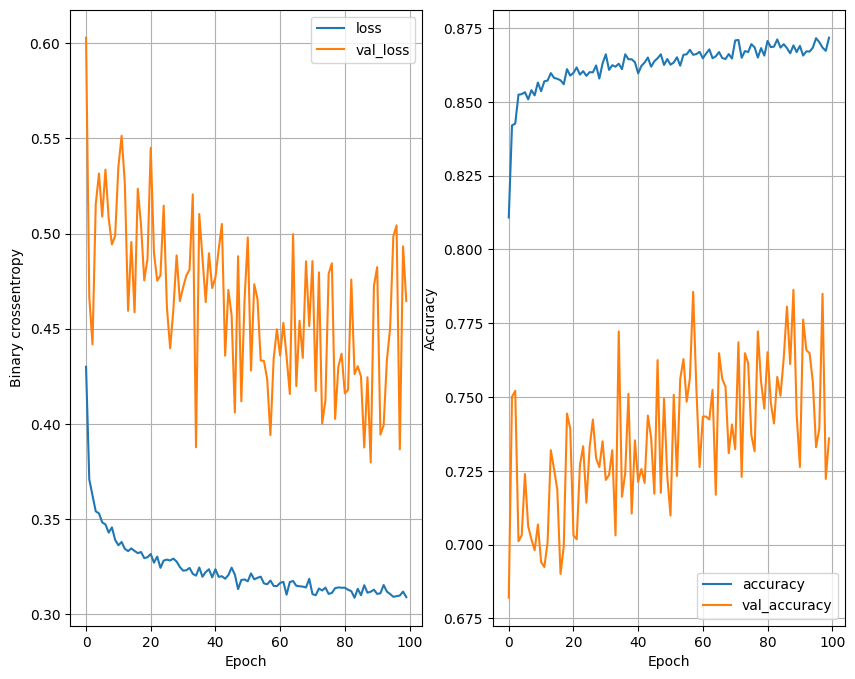

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8779 - loss: 0.3095
32 nodes, dropout 0.2, lr 0.005, batch size 64


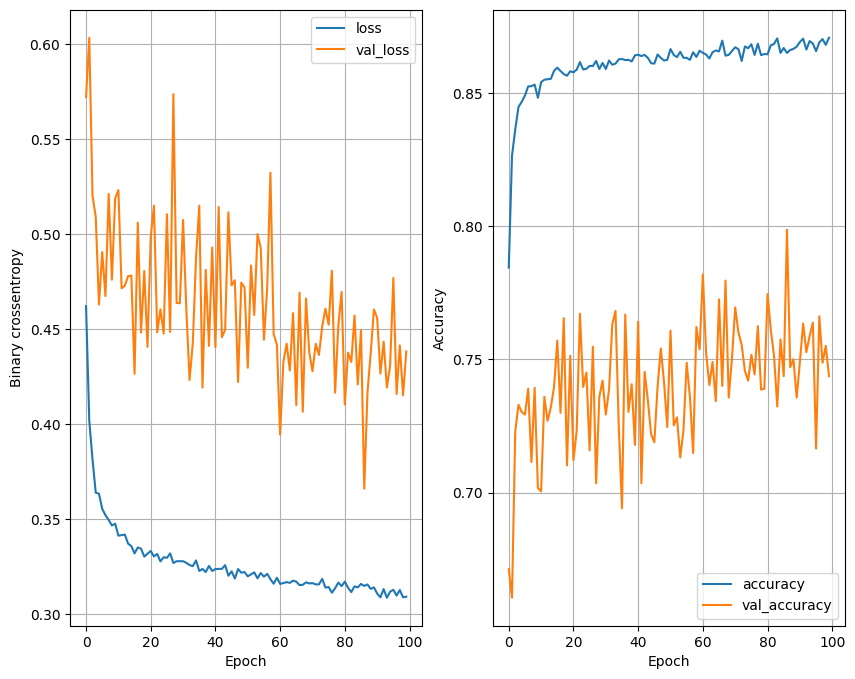

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8703 - loss: 0.3087
32 nodes, dropout 0.2, lr 0.005, batch size 128


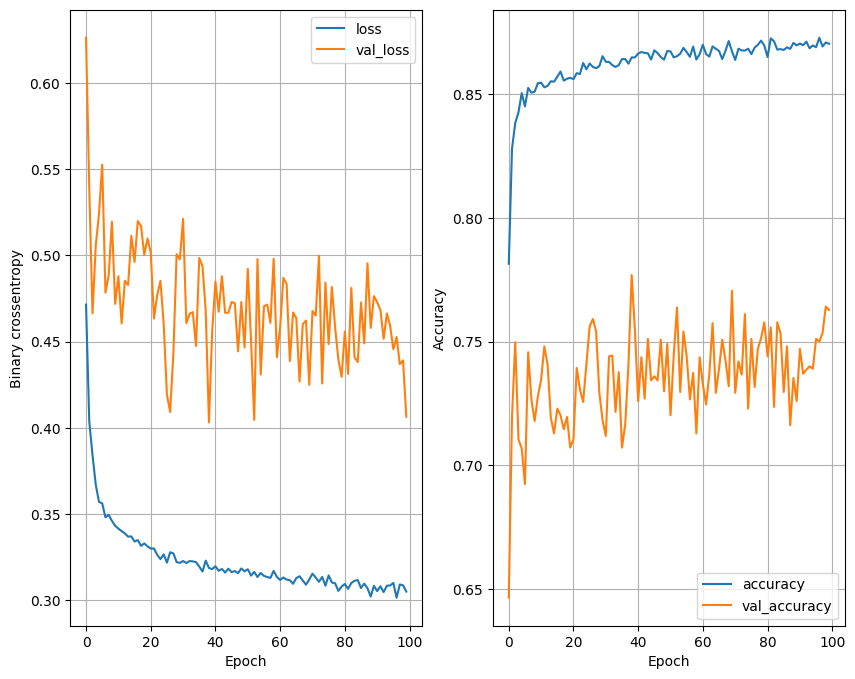

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8839 - loss: 0.3039
32 nodes, dropout 0.2, lr 0.001, batch size 32


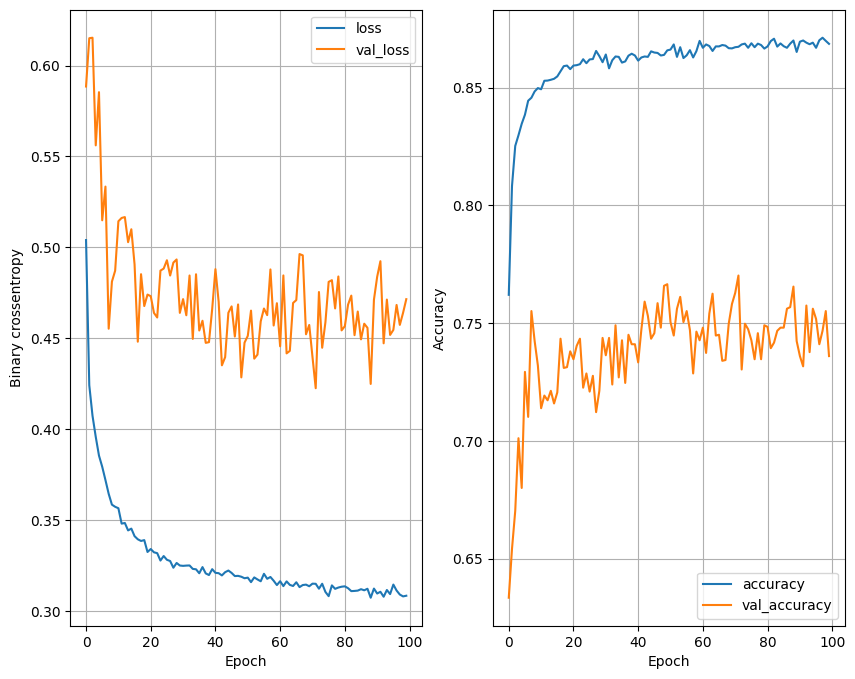

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8727 - loss: 0.3074
32 nodes, dropout 0.2, lr 0.001, batch size 64


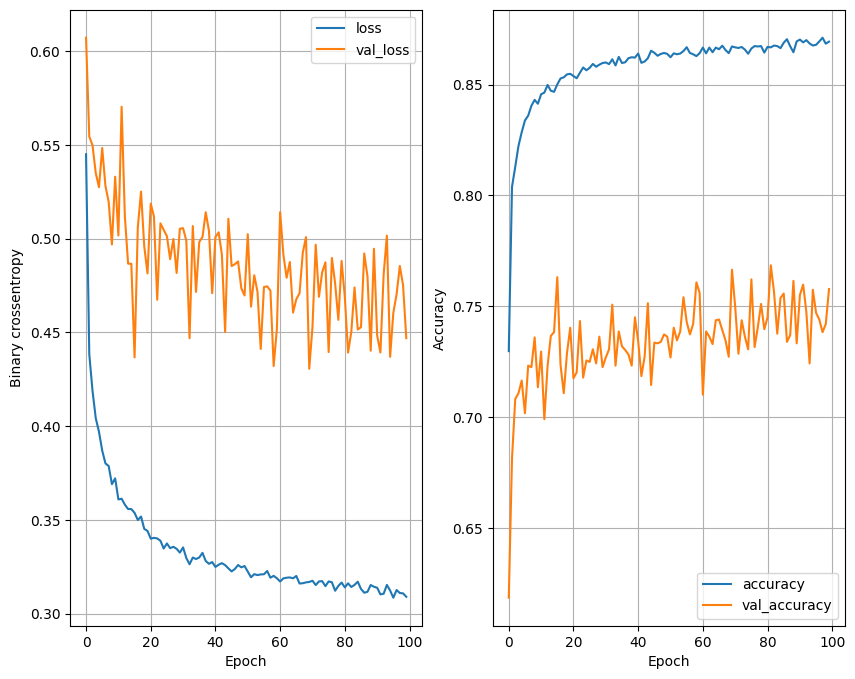

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.3049
32 nodes, dropout 0.2, lr 0.001, batch size 128


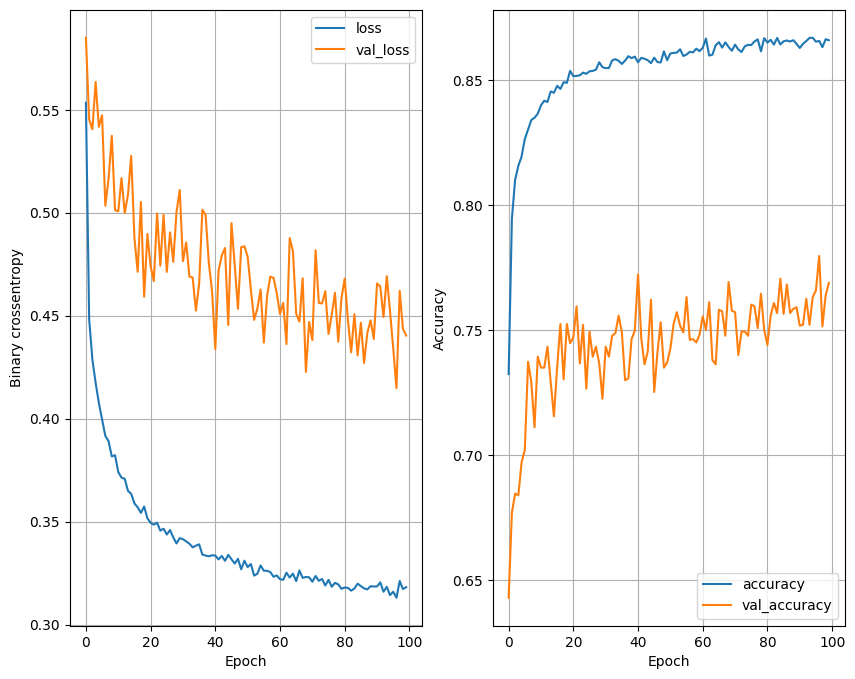

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.3101
64 nodes, dropout 0, lr 0.01, batch size 32


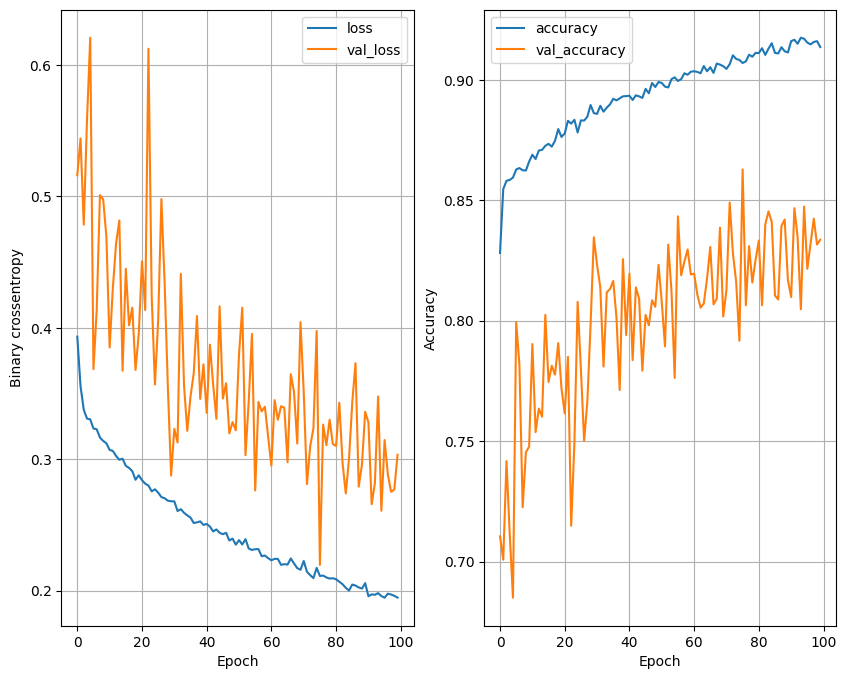

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8670 - loss: 0.5037
64 nodes, dropout 0, lr 0.01, batch size 64


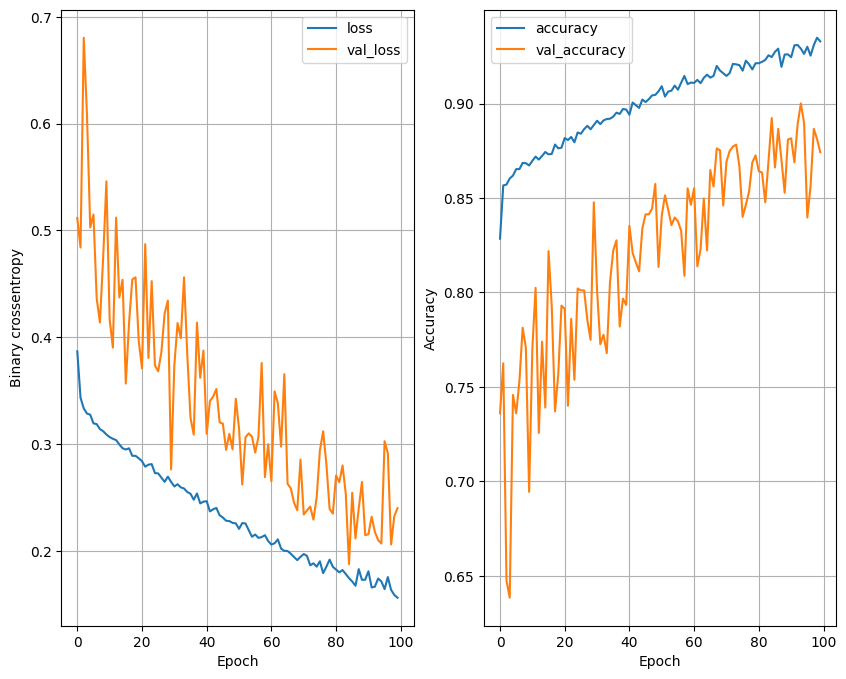

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8546 - loss: 0.6045
64 nodes, dropout 0, lr 0.01, batch size 128


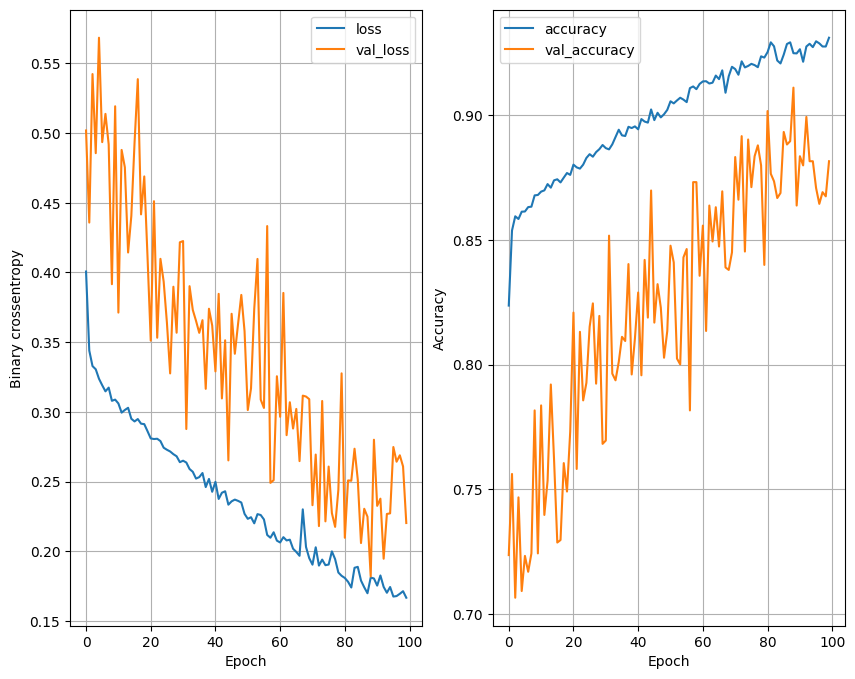

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.5289
64 nodes, dropout 0, lr 0.005, batch size 32


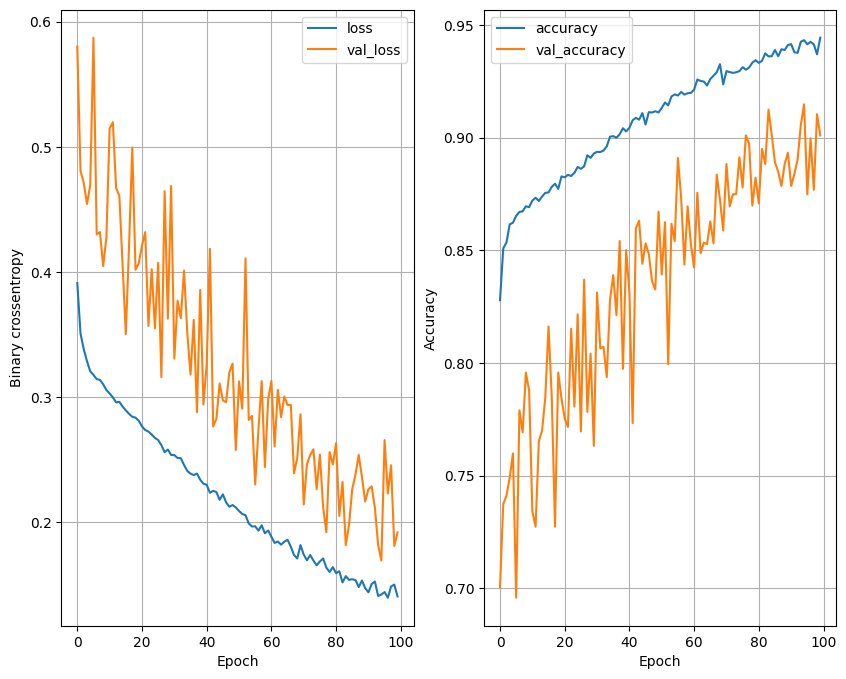

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.6286
64 nodes, dropout 0, lr 0.005, batch size 64


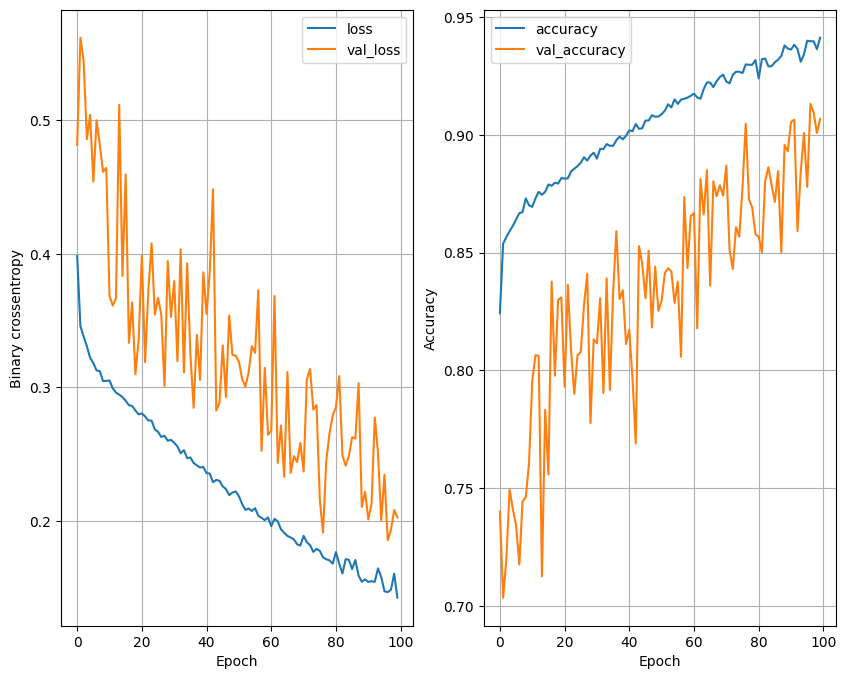

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.5637
64 nodes, dropout 0, lr 0.005, batch size 128


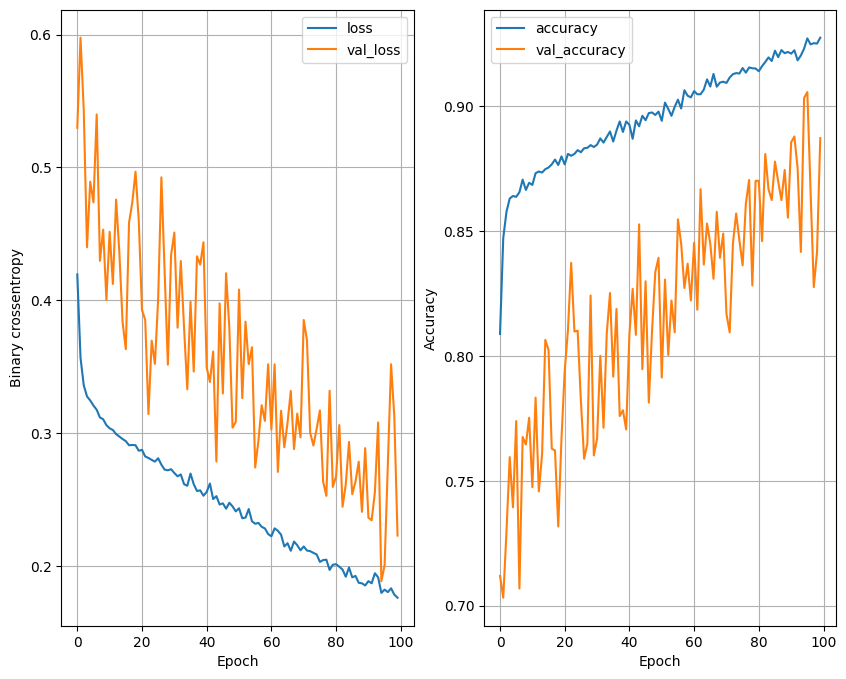

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8559 - loss: 0.4640
64 nodes, dropout 0, lr 0.001, batch size 32


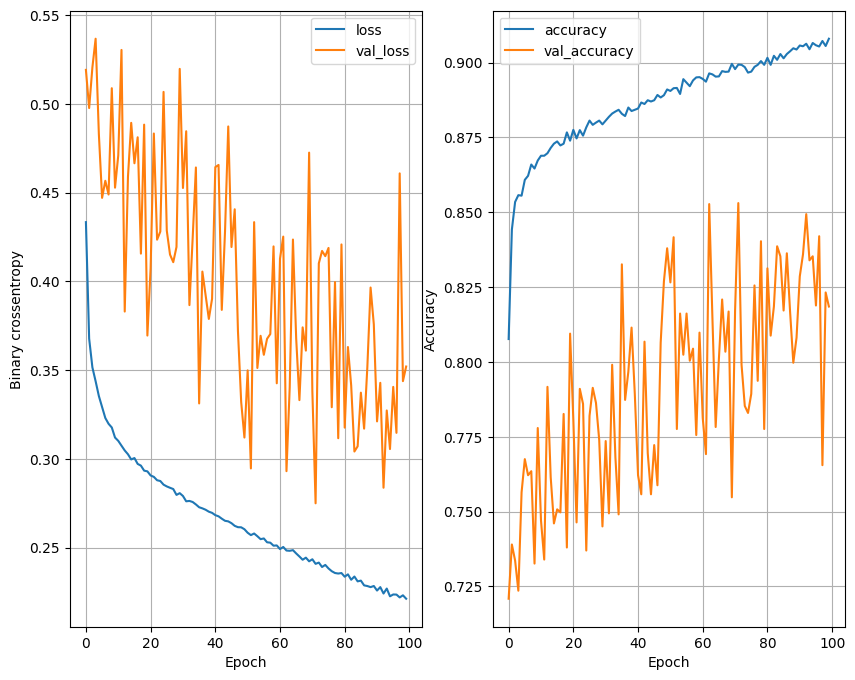

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8702 - loss: 0.3549
64 nodes, dropout 0, lr 0.001, batch size 64


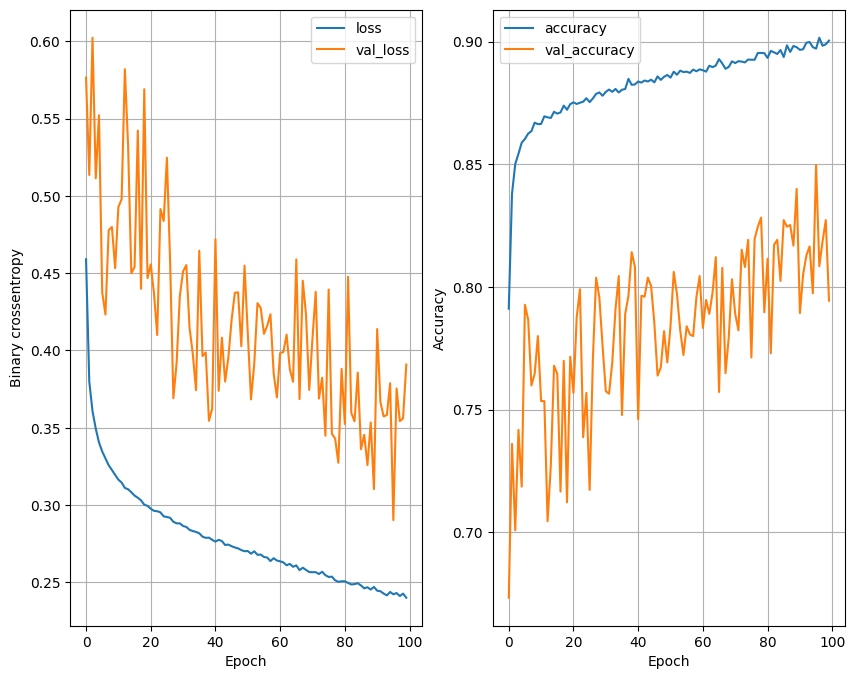

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8798 - loss: 0.3153
64 nodes, dropout 0, lr 0.001, batch size 128


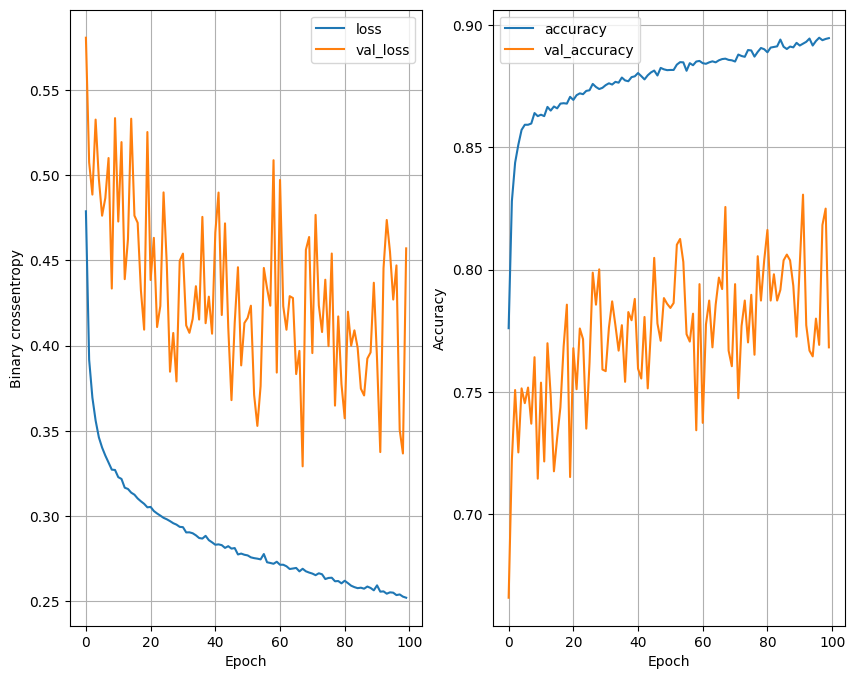

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8771 - loss: 0.3324
64 nodes, dropout 0.2, lr 0.01, batch size 32


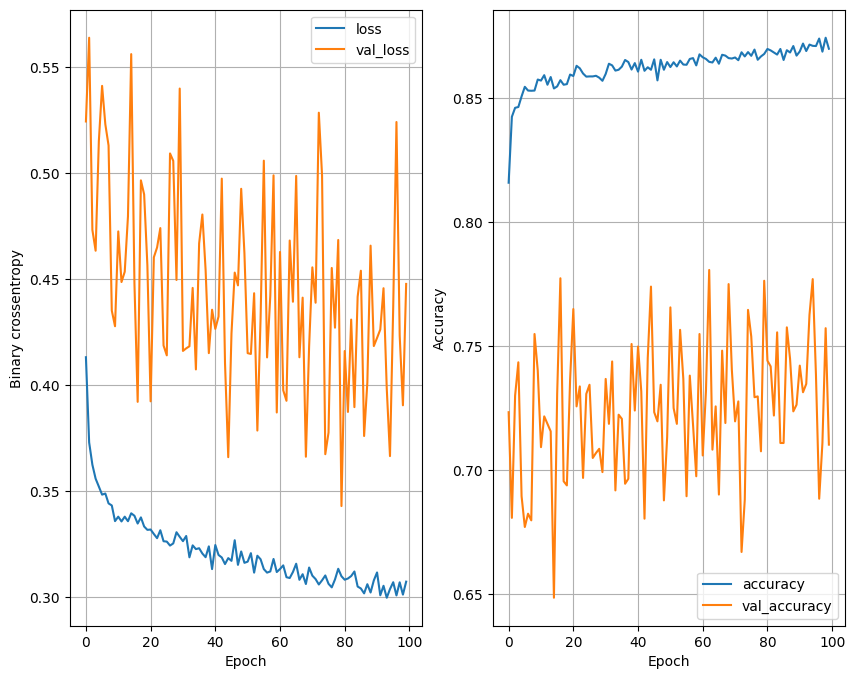

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8695 - loss: 0.3232
64 nodes, dropout 0.2, lr 0.01, batch size 64


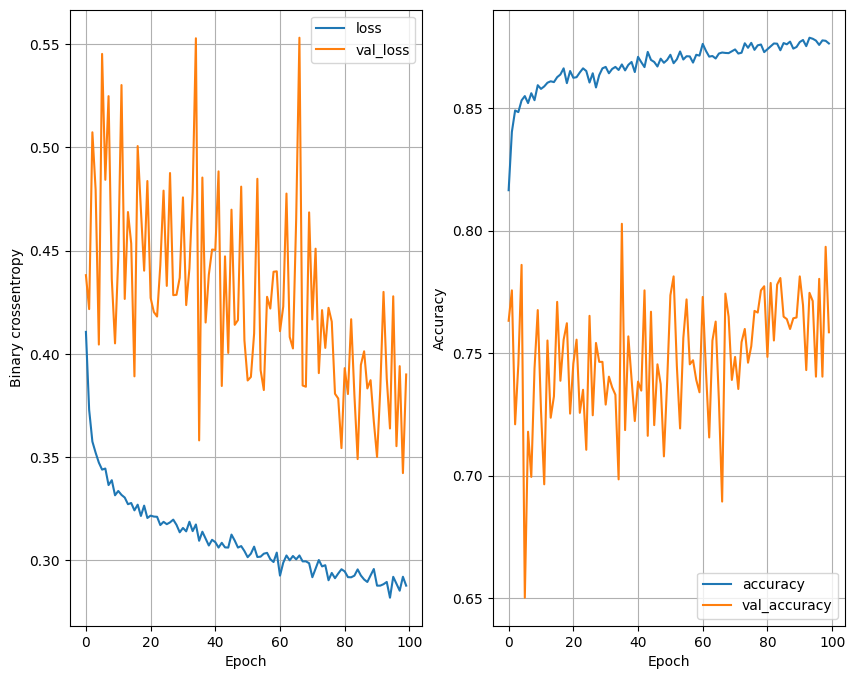

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8758 - loss: 0.3149
64 nodes, dropout 0.2, lr 0.01, batch size 128


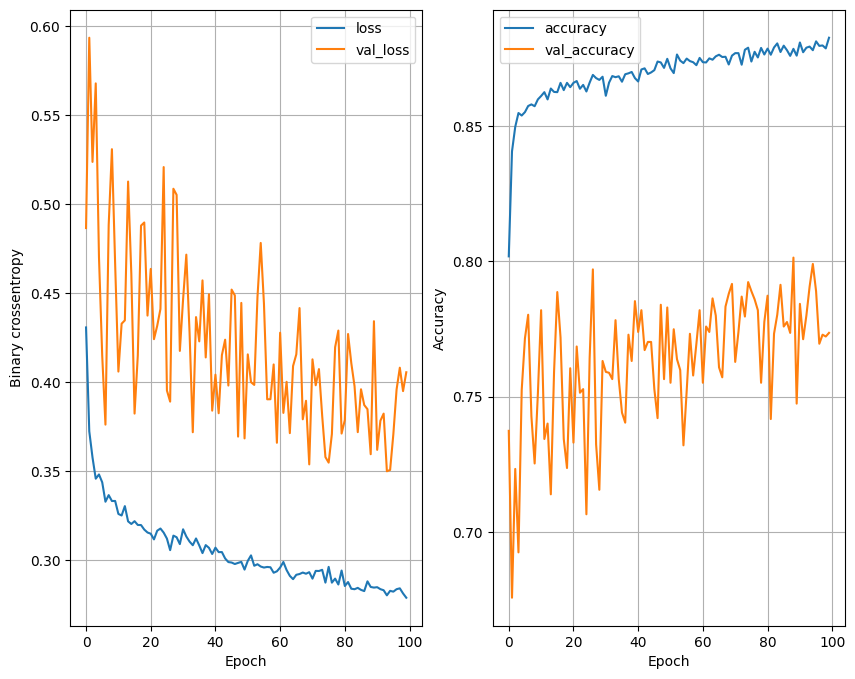

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8705 - loss: 0.3189
64 nodes, dropout 0.2, lr 0.005, batch size 32


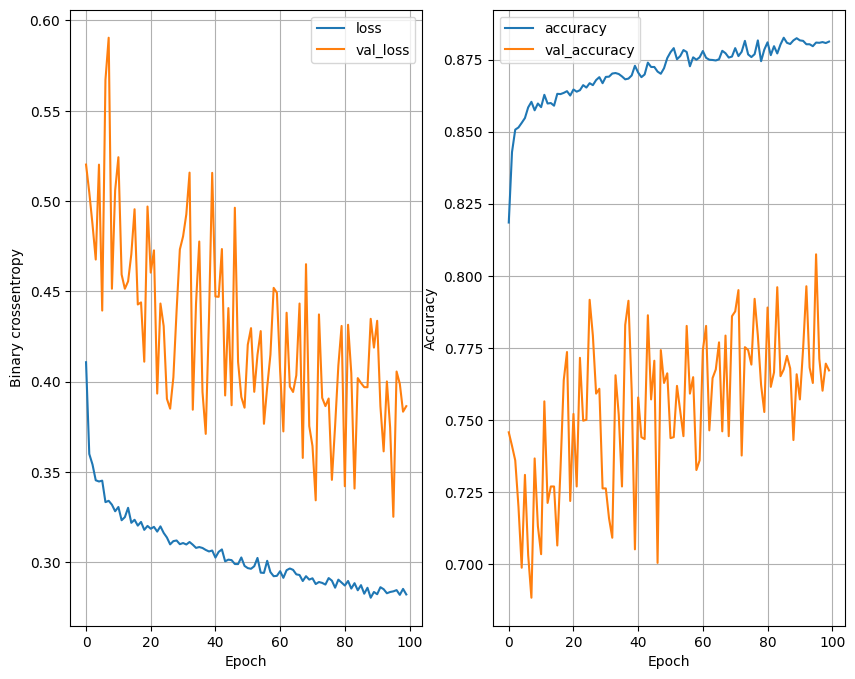

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8658 - loss: 0.3231
64 nodes, dropout 0.2, lr 0.005, batch size 64


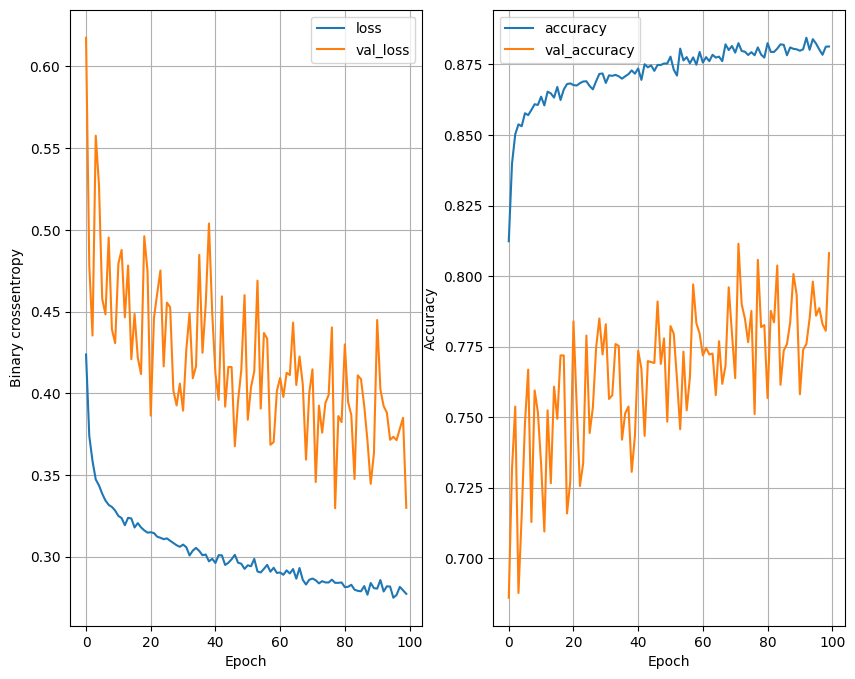

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8800 - loss: 0.3142
64 nodes, dropout 0.2, lr 0.005, batch size 128


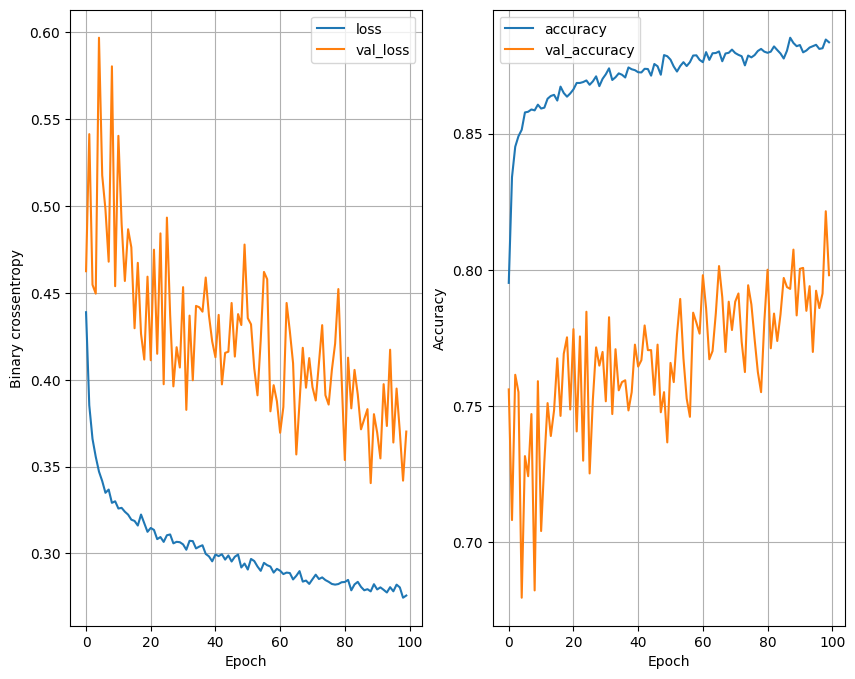

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8779 - loss: 0.3092
64 nodes, dropout 0.2, lr 0.001, batch size 32


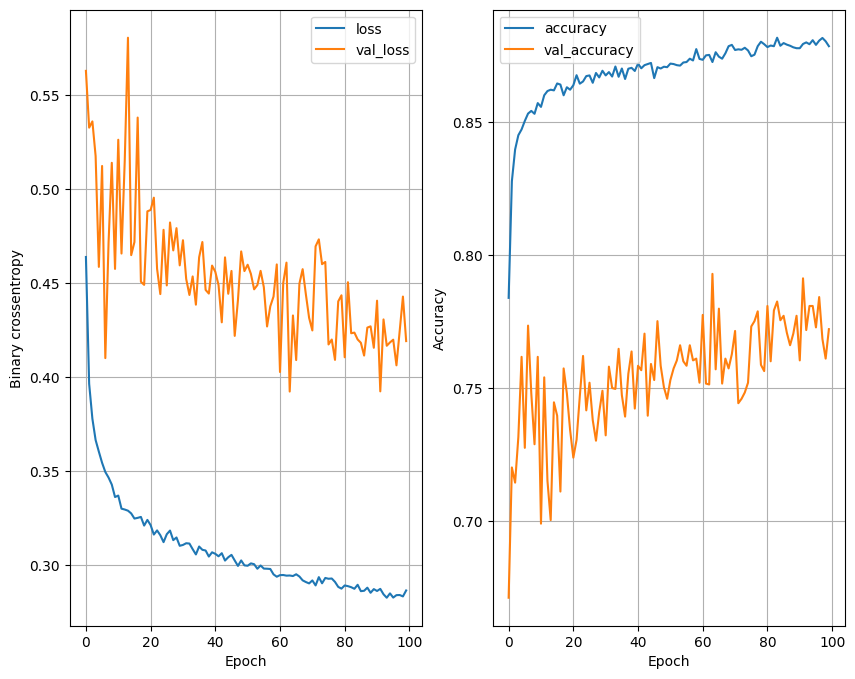

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8769 - loss: 0.3072
64 nodes, dropout 0.2, lr 0.001, batch size 64


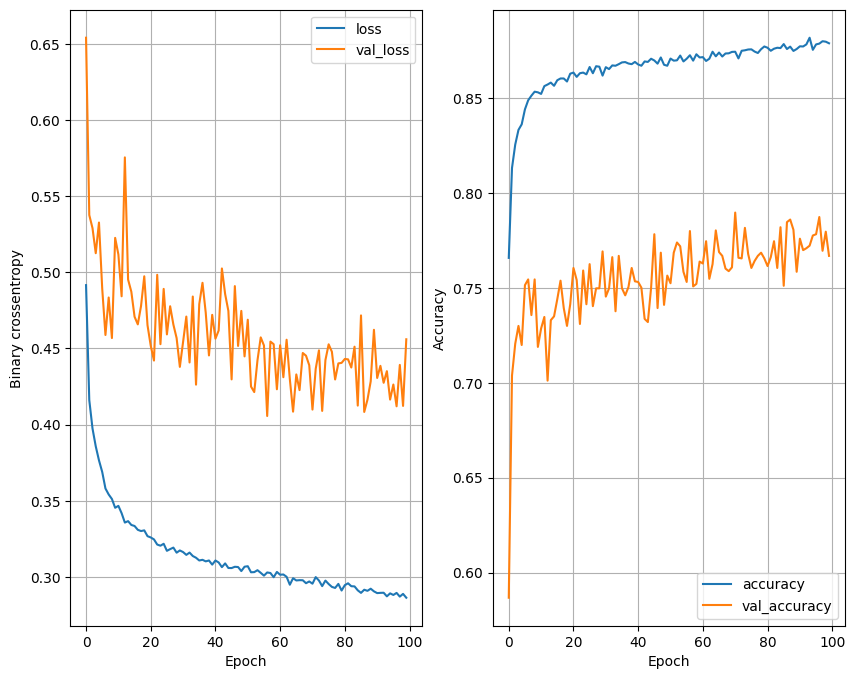

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8785 - loss: 0.3078
64 nodes, dropout 0.2, lr 0.001, batch size 128


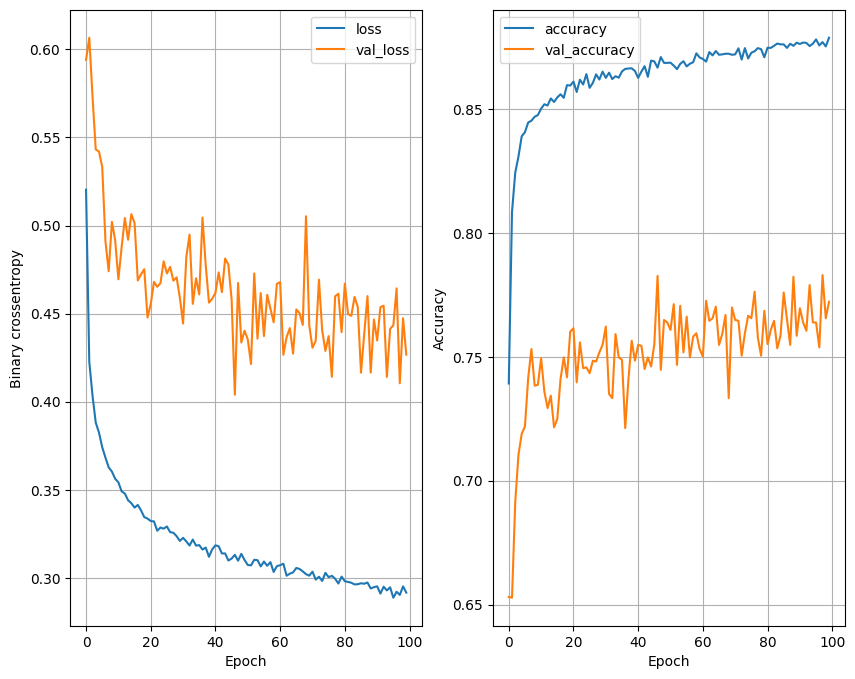

  1/119 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9062 - loss: 0.2277

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)

                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)

                # If evaluate() returns a list (loss + metrics), pick the loss only
                if isinstance(val_loss, list):
                    val_loss = val_loss[0]

                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [40]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2492
           1       0.88      0.76      0.82      1312

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.87      3804
weighted avg       0.88      0.88      0.88      3804



YAYYY :)